In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
df1 = pd.read_csv(r"E:\Academics\Projects\Machine Learning Projects\Marketing Project\Marketing_data.csv")
df1.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df1.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
approx_value = 40761
tolerance = 50 

In [6]:
df1[(df1["ONEOFF_PURCHASES"] >= approx_value - tolerance) & (df1["ONEOFF_PURCHASES"] <= approx_value + tolerance)]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [7]:
print(df1["ONEOFF_PURCHASES"].max())

40761.25


In [8]:
min_Cash = 47000
max_cash = 48000

In [9]:
df1[(df1["CASH_ADVANCE"] >= min_Cash) & (df1["CASH_ADVANCE"] <= max_cash)]    


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

In [10]:
df1["CASH_ADVANCE"].max()

47137.21176

In [11]:
df1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
df1["MINIMUM_PAYMENTS"] = df1["MINIMUM_PAYMENTS"].fillna(df1["MINIMUM_PAYMENTS"].mean())
df1["CREDIT_LIMIT"] = df1["CREDIT_LIMIT"].fillna(df1["CREDIT_LIMIT"].mean())

In [13]:
df1.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

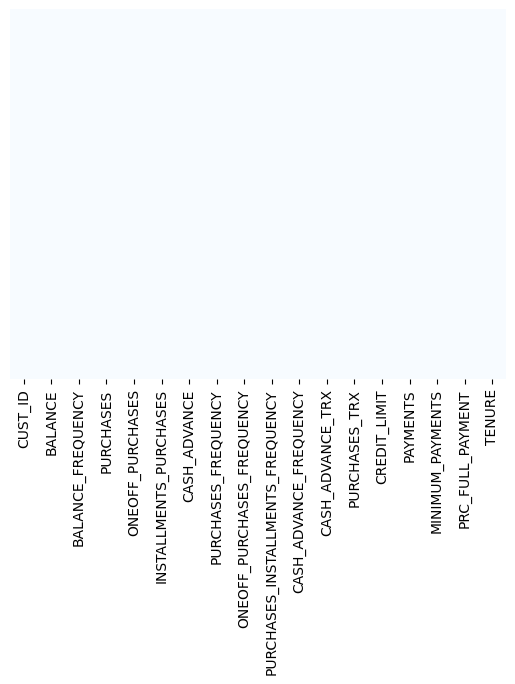

In [14]:
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap="Blues")
plt.show()

In [15]:
df1.duplicated().sum()

0

In [16]:
df1.drop_duplicates(inplace=True)

In [17]:
df1.drop(columns=["CUST_ID"], inplace=True)

In [18]:
df1.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [19]:
n = len(df1.columns)

In [20]:
n

17

In [21]:
columns = list(df1.columns)
columns

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

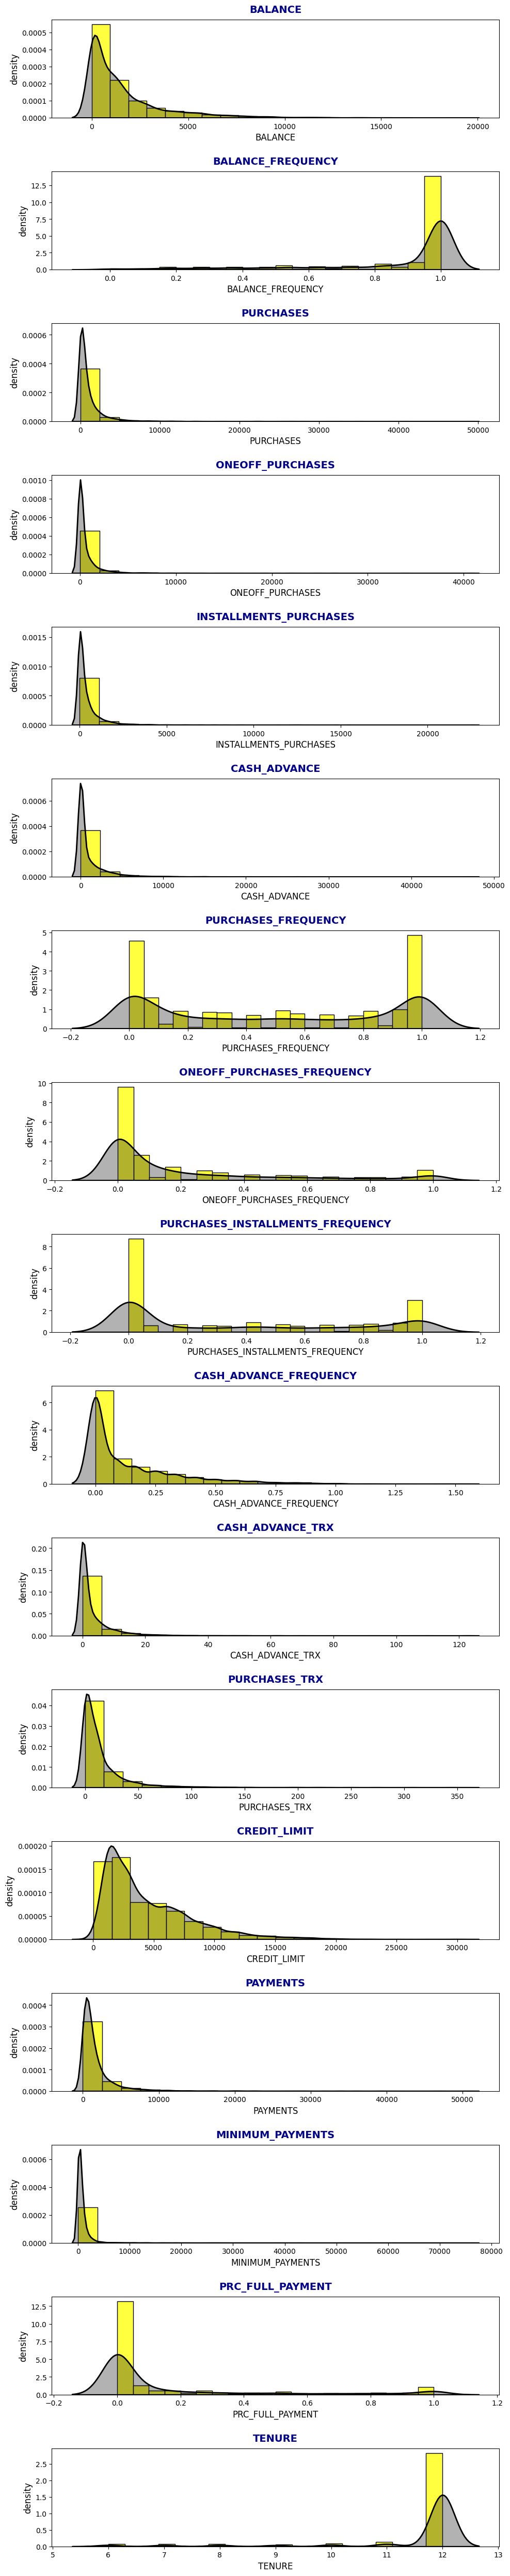

In [22]:
plt.figure(figsize=(10, 50))
for i in range(n):
    plt.subplot(n, 1, i + 1)  
    sns.histplot(df1[columns[i]], color="yellow", edgecolor="black", bins=20, stat="density")
    sns.kdeplot(df1[columns[i]], color="black", linewidth=2, fill=True, alpha=0.3)
    plt.title(columns[i], fontsize=14, weight='bold', pad=10, color="darkblue")  
    plt.xlabel(columns[i], fontsize=12, color="black")  
    plt.ylabel("density", fontsize=12, color="black") 
plt.tight_layout(h_pad=2)  
plt.show()

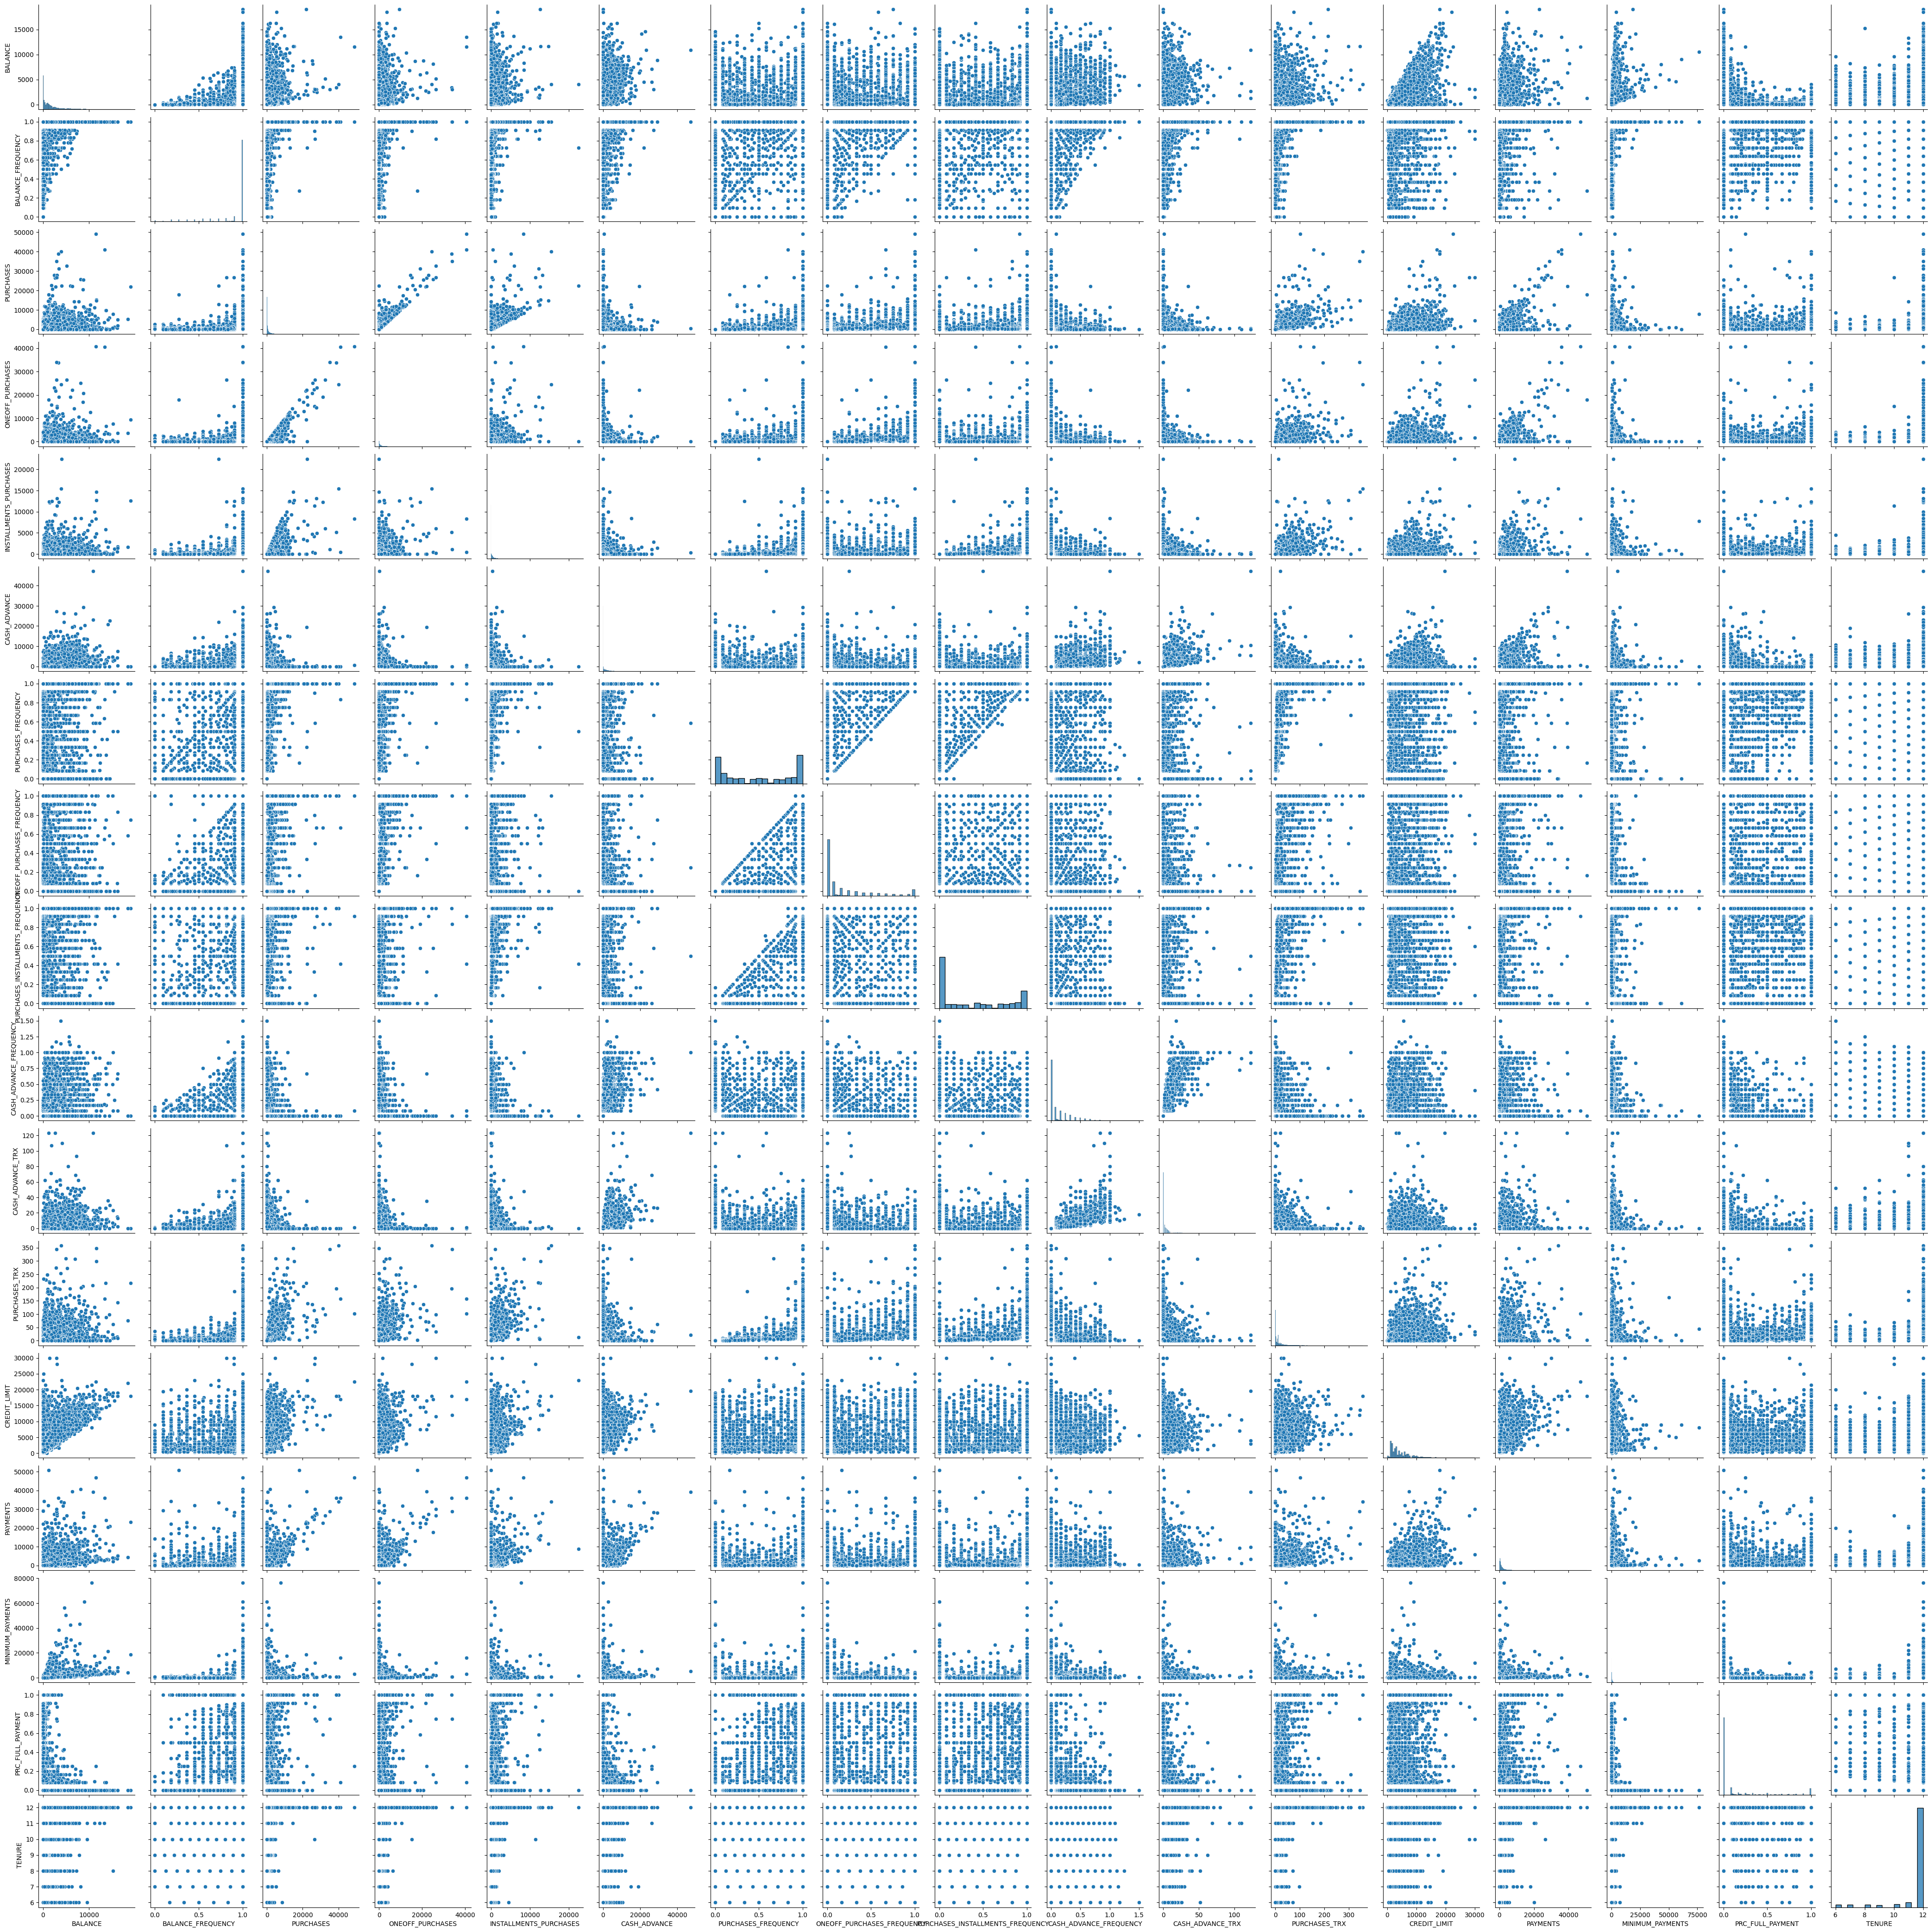

In [23]:
sns.pairplot(df1)
plt.show()

In [24]:
correlations = df1.corr()
correlations

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

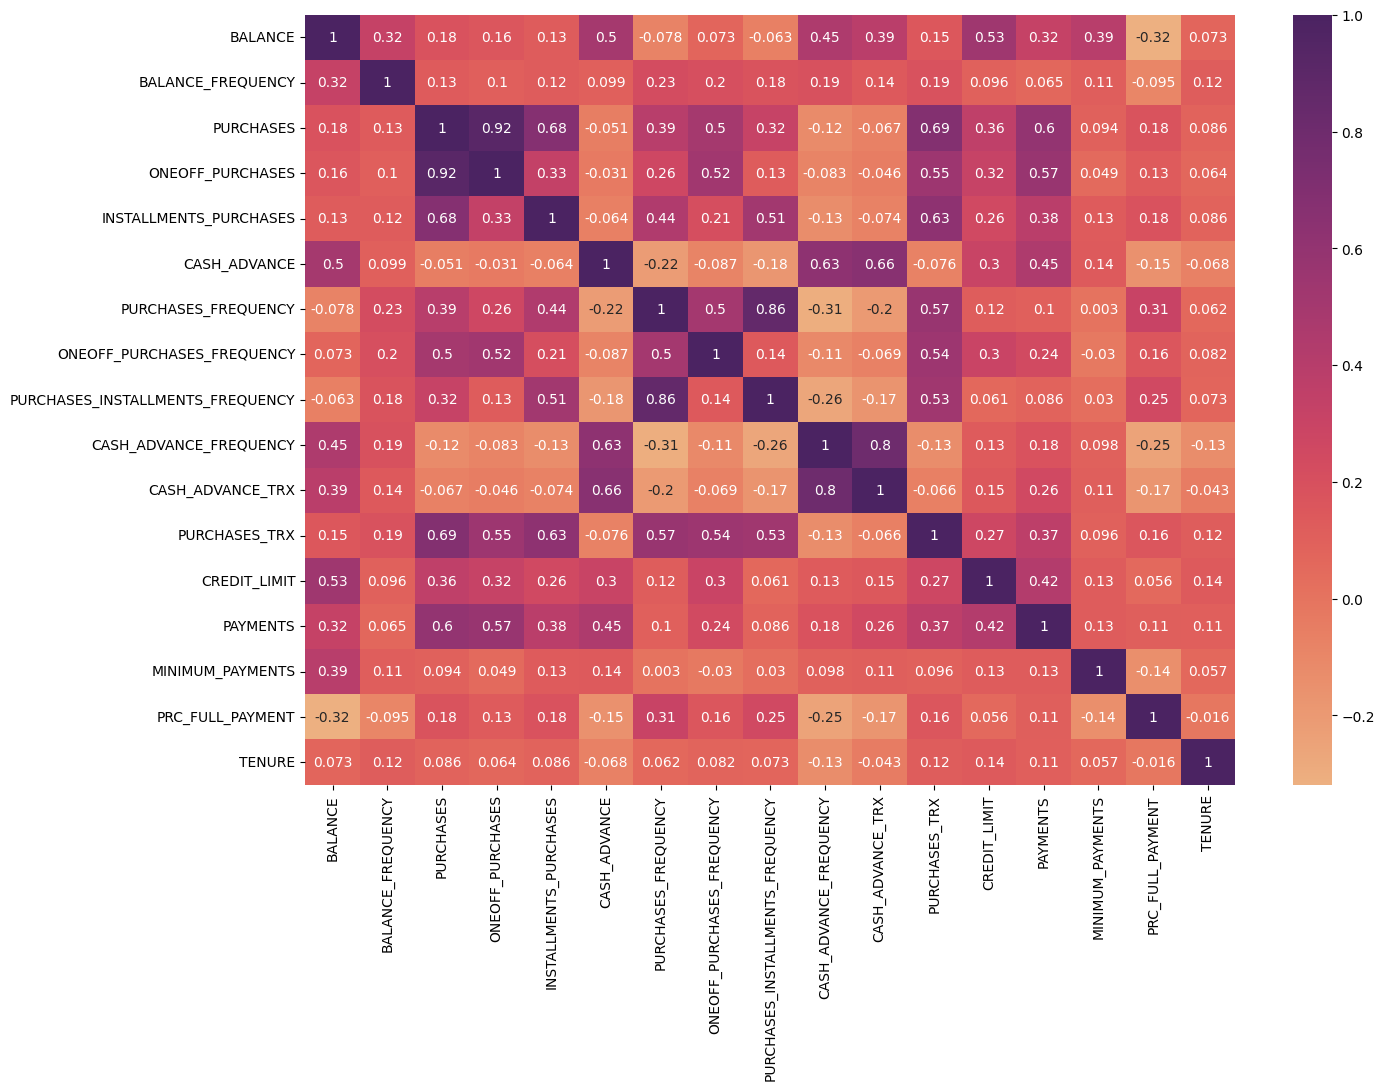

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap="flare")
plt.show()

In [26]:
df1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

In [27]:
scaler = StandardScaler()

In [28]:
df1_scaled  = scaler.fit_transform(df1)

In [29]:
df1_scaled.shape

(8950, 17)

In [30]:
wcss = []
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10)
    kmeans.fit(df1_scaled)
    wcss.append(kmeans.inertia_)
display(wcss)

[127784.86513839262,
 111986.69806610137,
 99073.93826774822,
 91502.38799417869,
 84852.5940022627,
 79532.32854113291,
 75003.23442554056,
 69979.00377283973,
 66452.40483152626,
 63645.241755702744,
 61376.726957088475,
 59144.67897916309,
 57512.18554067234,
 55855.35567678541,
 54289.15609080024,
 53056.90850402933,
 51947.09288017931,
 50695.029303489275,
 49631.044348086536]

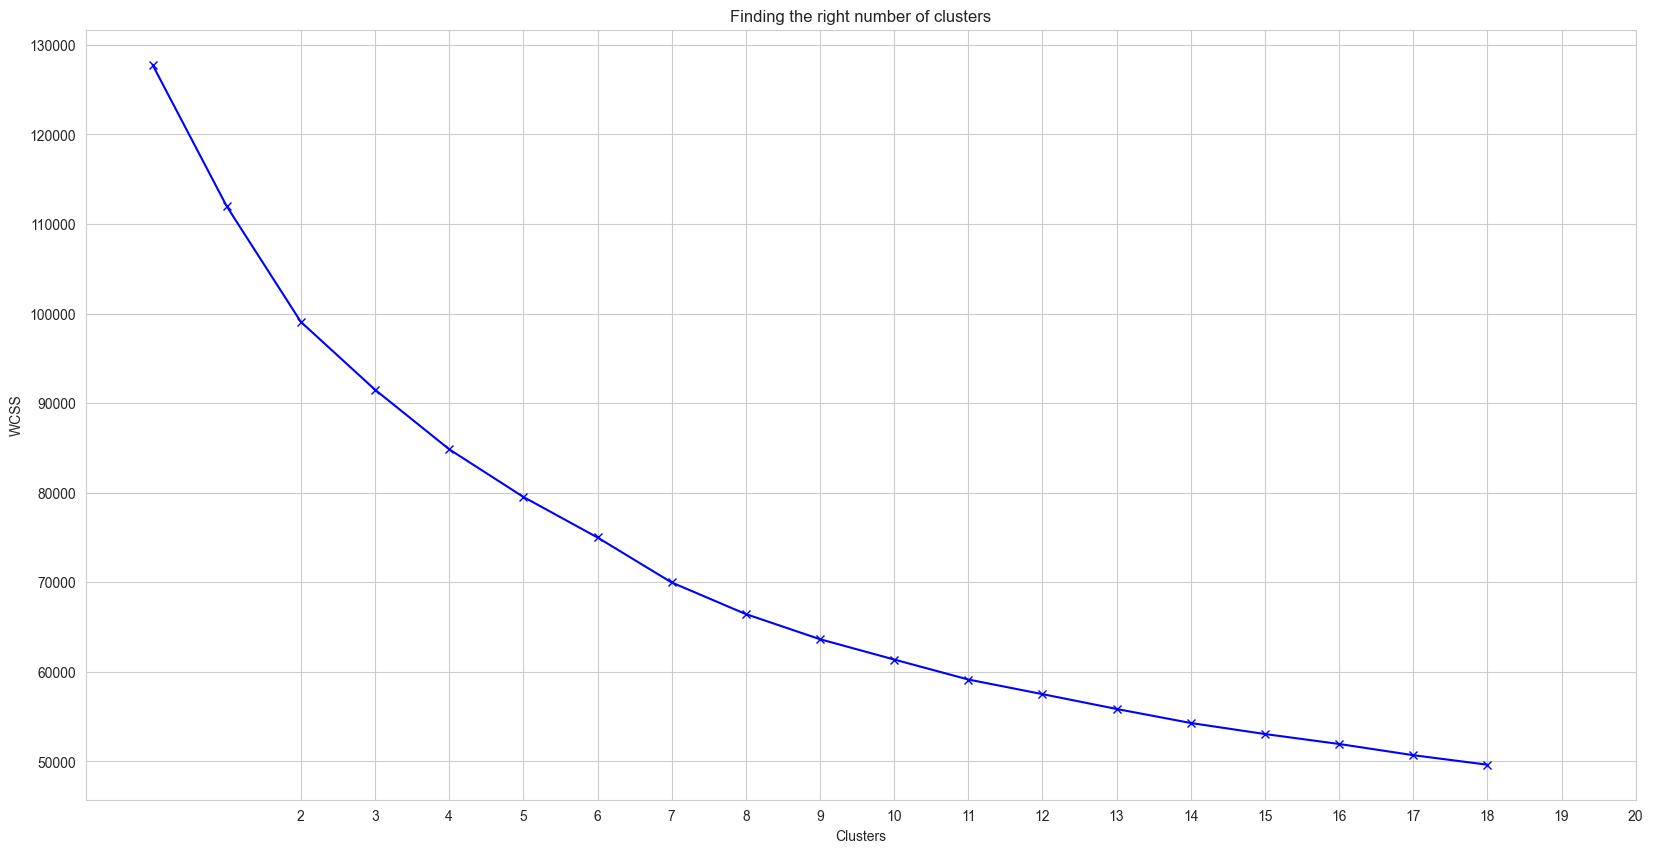

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.plot(wcss,"bx-")
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2,21))
plt.show()

In [32]:
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10)
kmeans.fit(df1_scaled)

KMeans(n_init=10)

In [33]:
kmeans.cluster_centers_.shape

(8, 17)

In [34]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df1.columns])
display(cluster_centers )   


BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.366866          0.333522  -0.040371        -0.244530   
1  0.026738          0.404416  -0.361606        -0.246730   
2 -0.701222         -2.139409  -0.310833        -0.235565   
3  1.706407          0.392093  -0.214220        -0.153701   
4  1.923051          0.337717  11.212042        10.600367   
5  0.935822          0.467293   2.246268         1.697962   
6 -0.166956          0.392874   0.473982         0.618097   
7 -0.336717         -0.351618  -0.289556        -0.216192   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.353604    -0.365041            0.987645   
1              -0.401613    -0.081208           -0.867232   
2              -0.302072    -0.322522           -0.555428   
3              -0.224212     2.052839           -0.471520   
4               7.033118     0.419625            1.046983   
5               2.191837    -0.192754            1.161273   
6              -0.014978    -0.333567            0.947554   
7              -0.287105     0.068131           -0.204713   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.387211                         1.202973   
1                  -0.409915                        -0.759077   
2                  -0.443021                        -0.439828   
3                  -0.209267                        -0.408478   
4                   1.915501                         0.981334   
5                   1.538110                         1.258858   
6                   1.885000                         0.091397   
7                  -0.289287                        -0.225660   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.476378        -0.362186      0.185357    -0.259172   
1               0.122071        -0.016041     -0.486612    -0.297882   
2              -0.521634        -0.376396     -0.419502    -0.177998   
3               1.940808         1.968510     -0.261985     1.040811   
4              -0.258912         0.061229      5.362438     3.044064   
5              -0.309830        -0.208589      2.789559     1.227251   
6              -0.407584        -0.324092      0.533478     0.377889   
7               0.308086         0.000466     -0.388444    -0.566467   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.218685        -0.055610         0.312466  0.257586  
1 -0.245601        -0.002453        -0.456232  0.271579  
2 -0.202299        -0.257071         0.280448  0.202001  
3  0.840372         0.522052        -0.390311  0.066741  
4  8.098975         1.120318         1.110132  0.310863  
5  1.275606         0.618524         0.269496  0.333865  
6  0.100207        -0.163096         0.418035  0.262536  
7 -0.392990        -0.208809         0.013145 -3.202809

In [35]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df1.columns])
display(cluster_centers)


BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   800.874133          0.956279    916.952045       186.567618   
1  1620.126719          0.973073    230.628603       182.915296   
2   104.939796          0.370465    339.104814       201.448528   
3  5116.217747          0.970154    545.520604       337.325118   
4  5567.142164          0.957273  24957.905000     18186.875667   
5  3512.308678          0.987968   5802.390885      3410.707273   
6  1216.971025          0.970339   2015.874493      1618.351024   
7   863.627544          0.793976    384.563451       233.602408   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             730.827742   213.362613            0.886740   
1              47.894316   808.574508            0.142288   
2             137.907386   302.527006            0.267430   
3             208.315948  5283.769393            0.301107   
4            6771.029333  1858.844605            0.910556   
5            2393.119019   574.657438            0.956426   
6             397.523469   279.366342            0.870650   
7             151.442584  1121.745122            0.408189   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.086945                         0.842529   
1                   0.080172                         0.062761   
2                   0.070296                         0.189639   
3                   0.140029                         0.202098   
4                   0.773889                         0.754444   
5                   0.661306                         0.864740   
6                   0.764790                         0.400761   
7                   0.116158                         0.274754   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.039816         0.777171     19.317122   3551.474046   
1               0.159572         3.139356      2.614484   3410.631553   
2               0.030760         0.680203      4.282572   3846.818481   
3               0.523520        16.682464      8.197867   8281.344248   
4               0.083333         3.666667    148.000000  15570.000000   
5               0.073144         1.825359     84.047847   8959.688995   
6               0.053582         1.037138     27.970109   5869.363472   
7               0.196795         3.252006      5.054575   2433.410031   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1100.071010       734.609325         0.245106  11.862035  
1   1022.152535       858.489531         0.020275  11.880761  
2   1147.508187       265.114438         0.235741  11.787648  
3   4165.938478      2080.827616         0.039555  11.606635  
4  25178.882690      3475.059479         0.478409  11.933333  
5   5425.897404      2305.650693         0.232538  11.964115  
6   2023.233532       484.118852         0.275983  11.868659  
7    595.475430       377.585275         0.157559   7.231140

In [36]:
kmeans.labels_.shape

(8950,)

In [37]:
kmeans.labels_.max()

7

In [38]:
kmeans.labels_.min()

0

In [39]:
y_kmeans = kmeans.fit_predict(df1_scaled)

In [40]:
y_kmeans

array([3, 4, 1, ..., 5, 5, 5])

In [41]:
df1_cluster = pd.concat([df1, pd.DataFrame(kmeans.labels_, columns=["Clusters"])], axis=1)
df1_cluster.head(8)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
6   627.260806           1.000000    7091.01           6402.63   
7  1823.652743           1.000000     436.20              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Clusters  
0   201.802084        139.509787          0.000000      12         3  
1  4103.032597       1072.340217          0.222222      12         4  
2   622.066742        627.284787          0.000000      12         1  
3     0.000000        864.206542          0.000000      12         3  
4   678.334763        244.791237          0.000000      12         3  
5  1400.057770       2407.246035          0.000000      12         2  
6  6354.314328        198.065894          1.000000      12         7  
7   679.065082        532.033990          0.000000      12         2

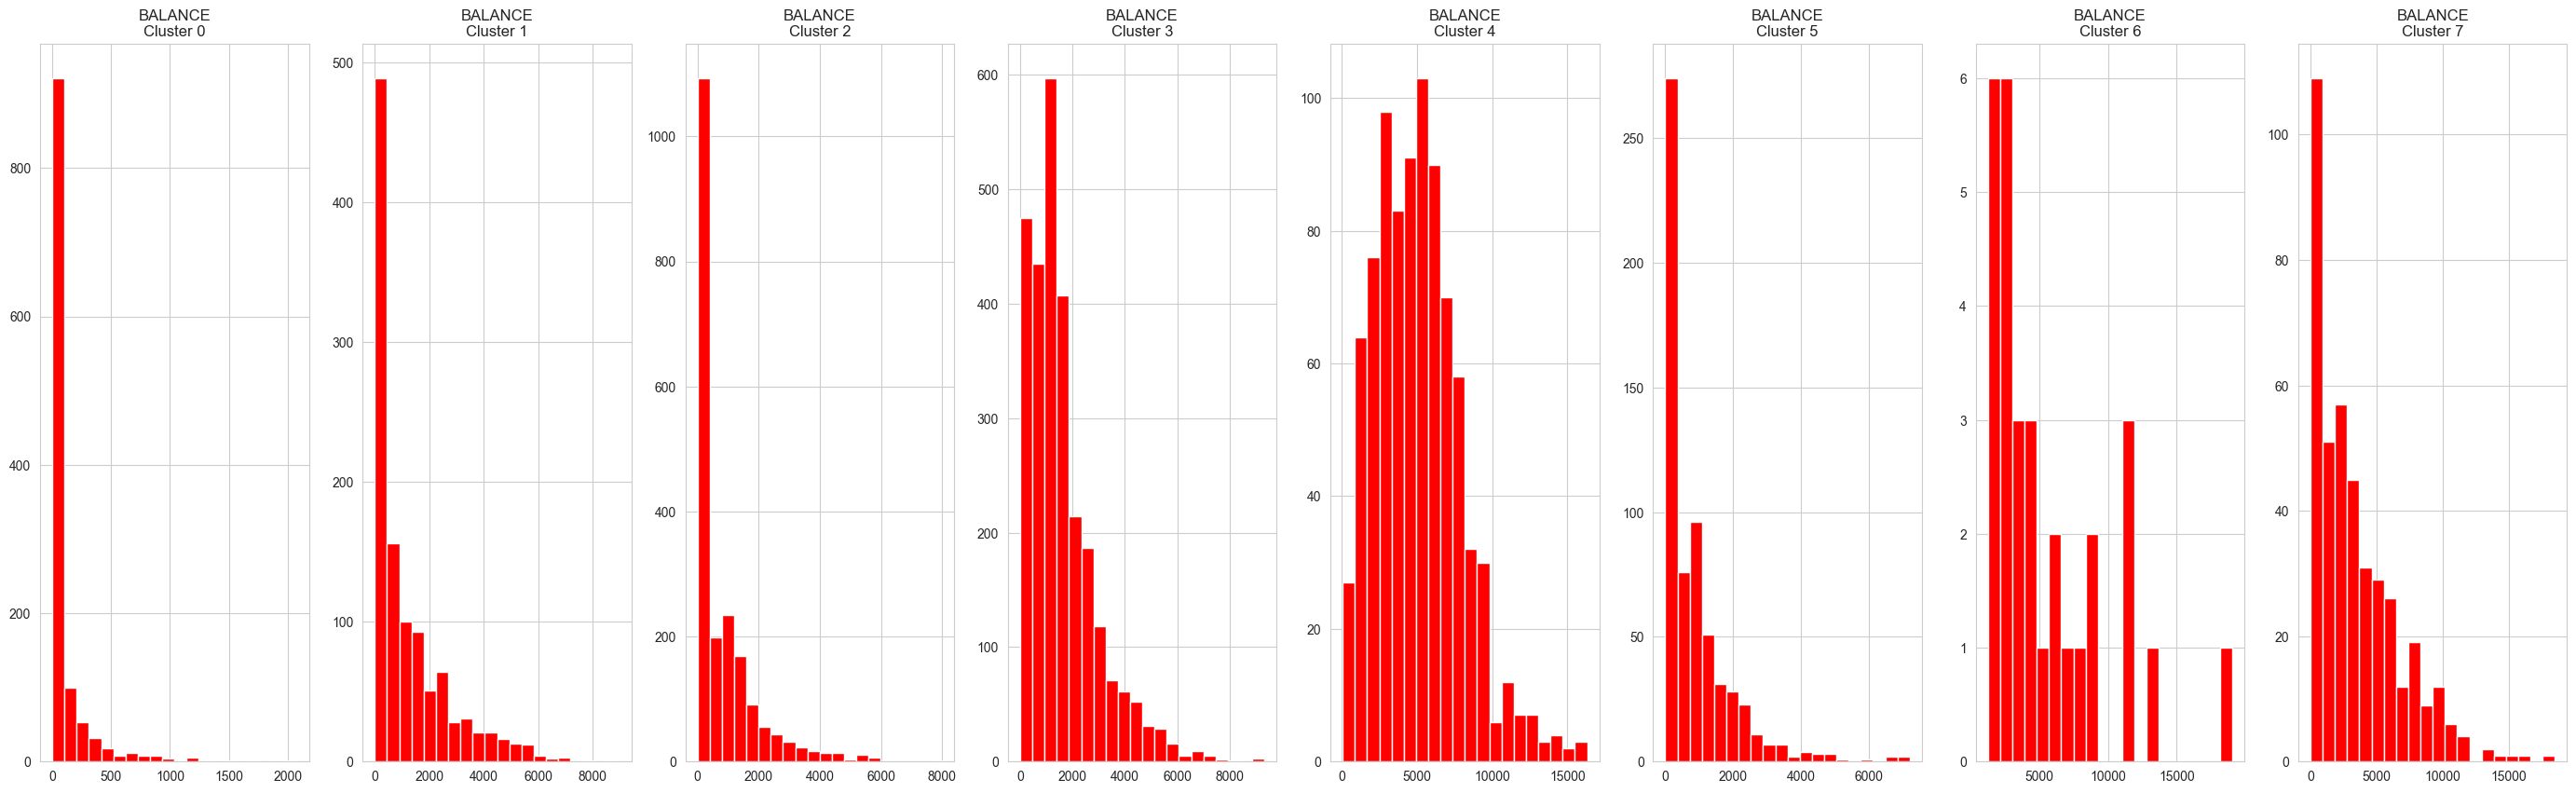

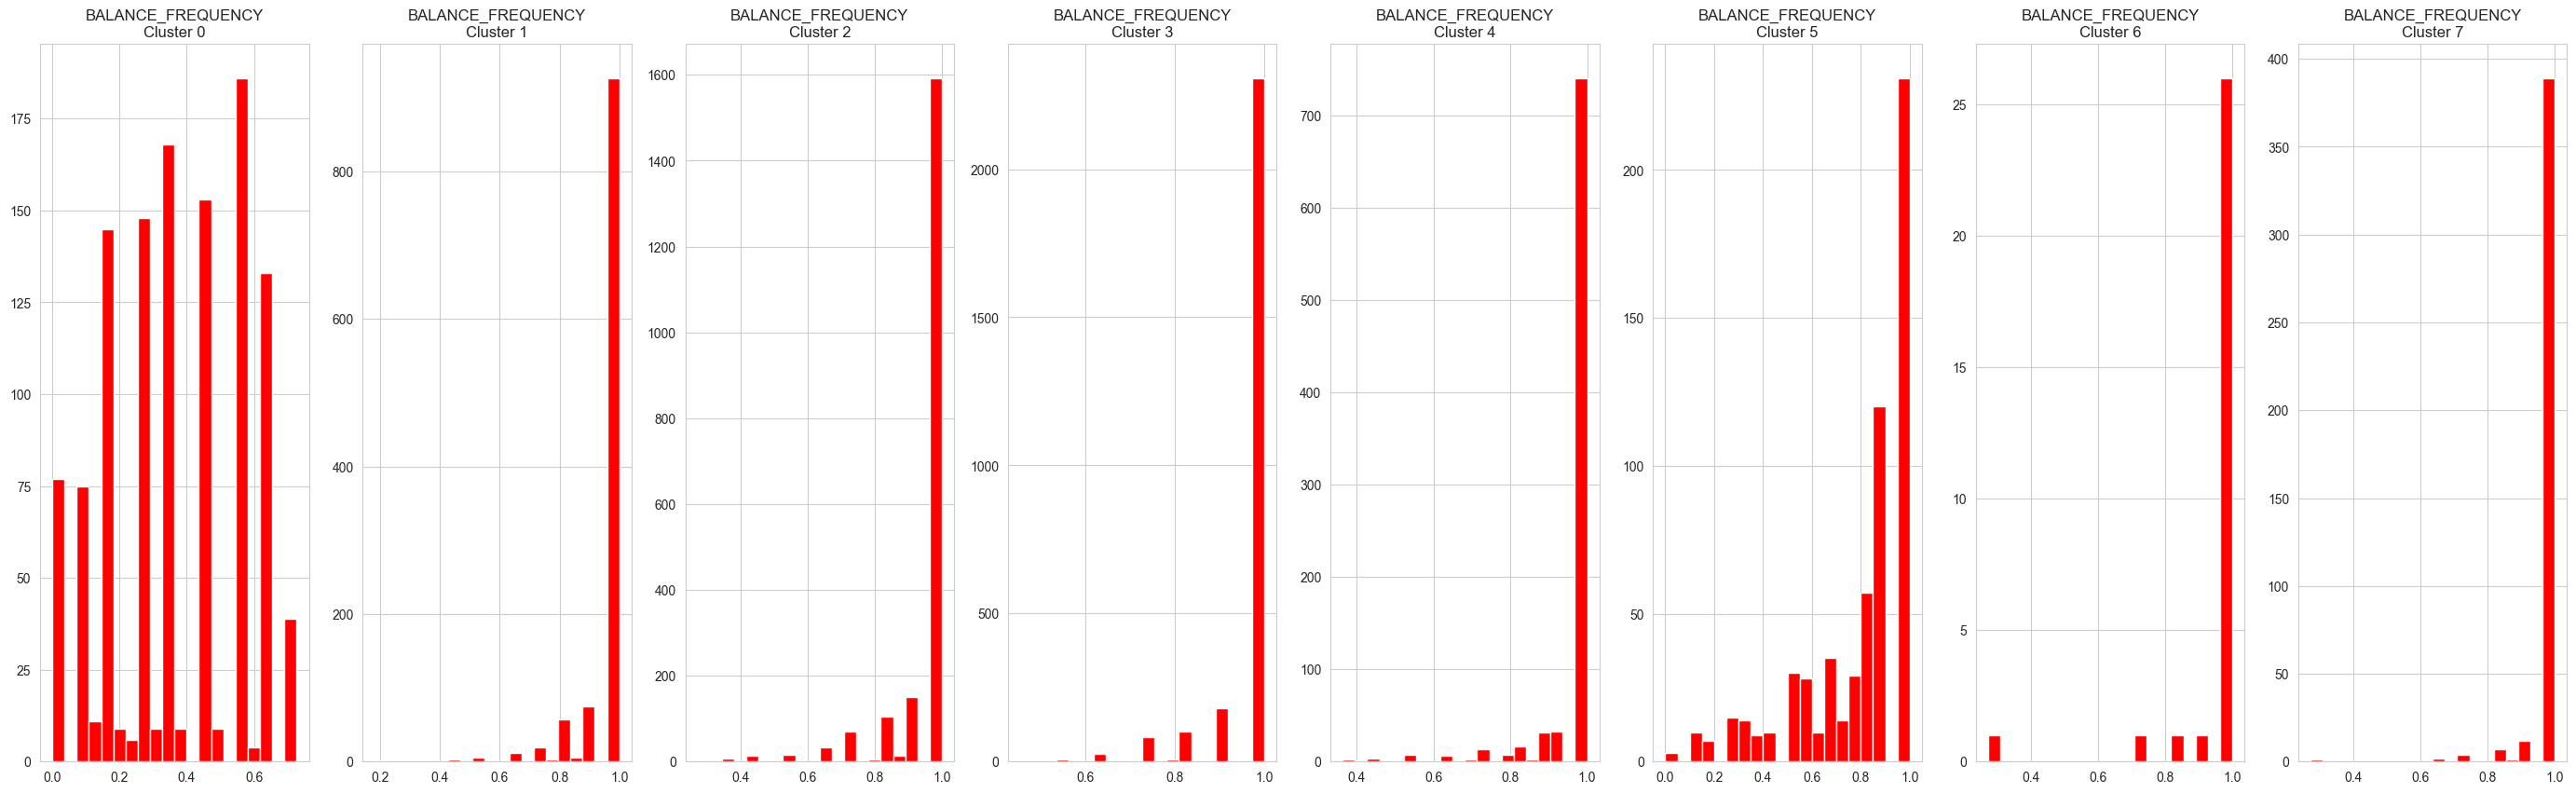

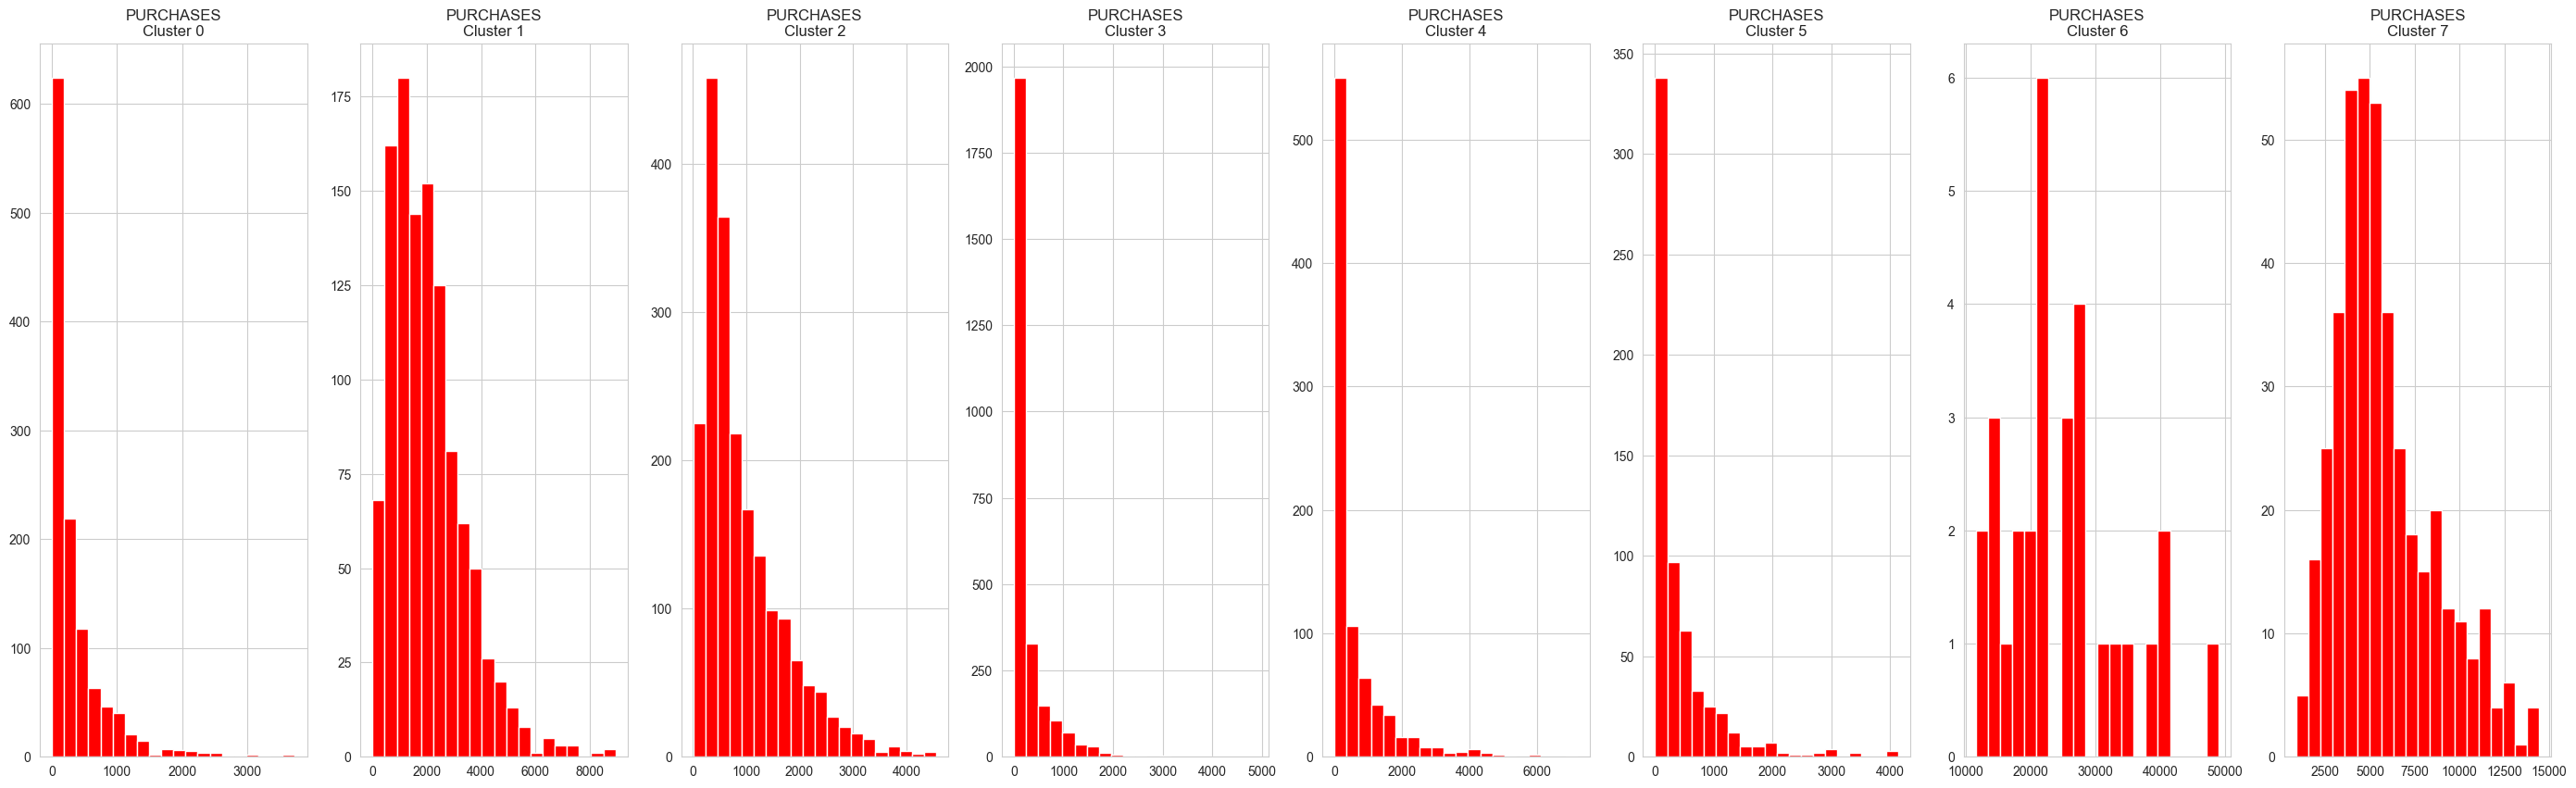

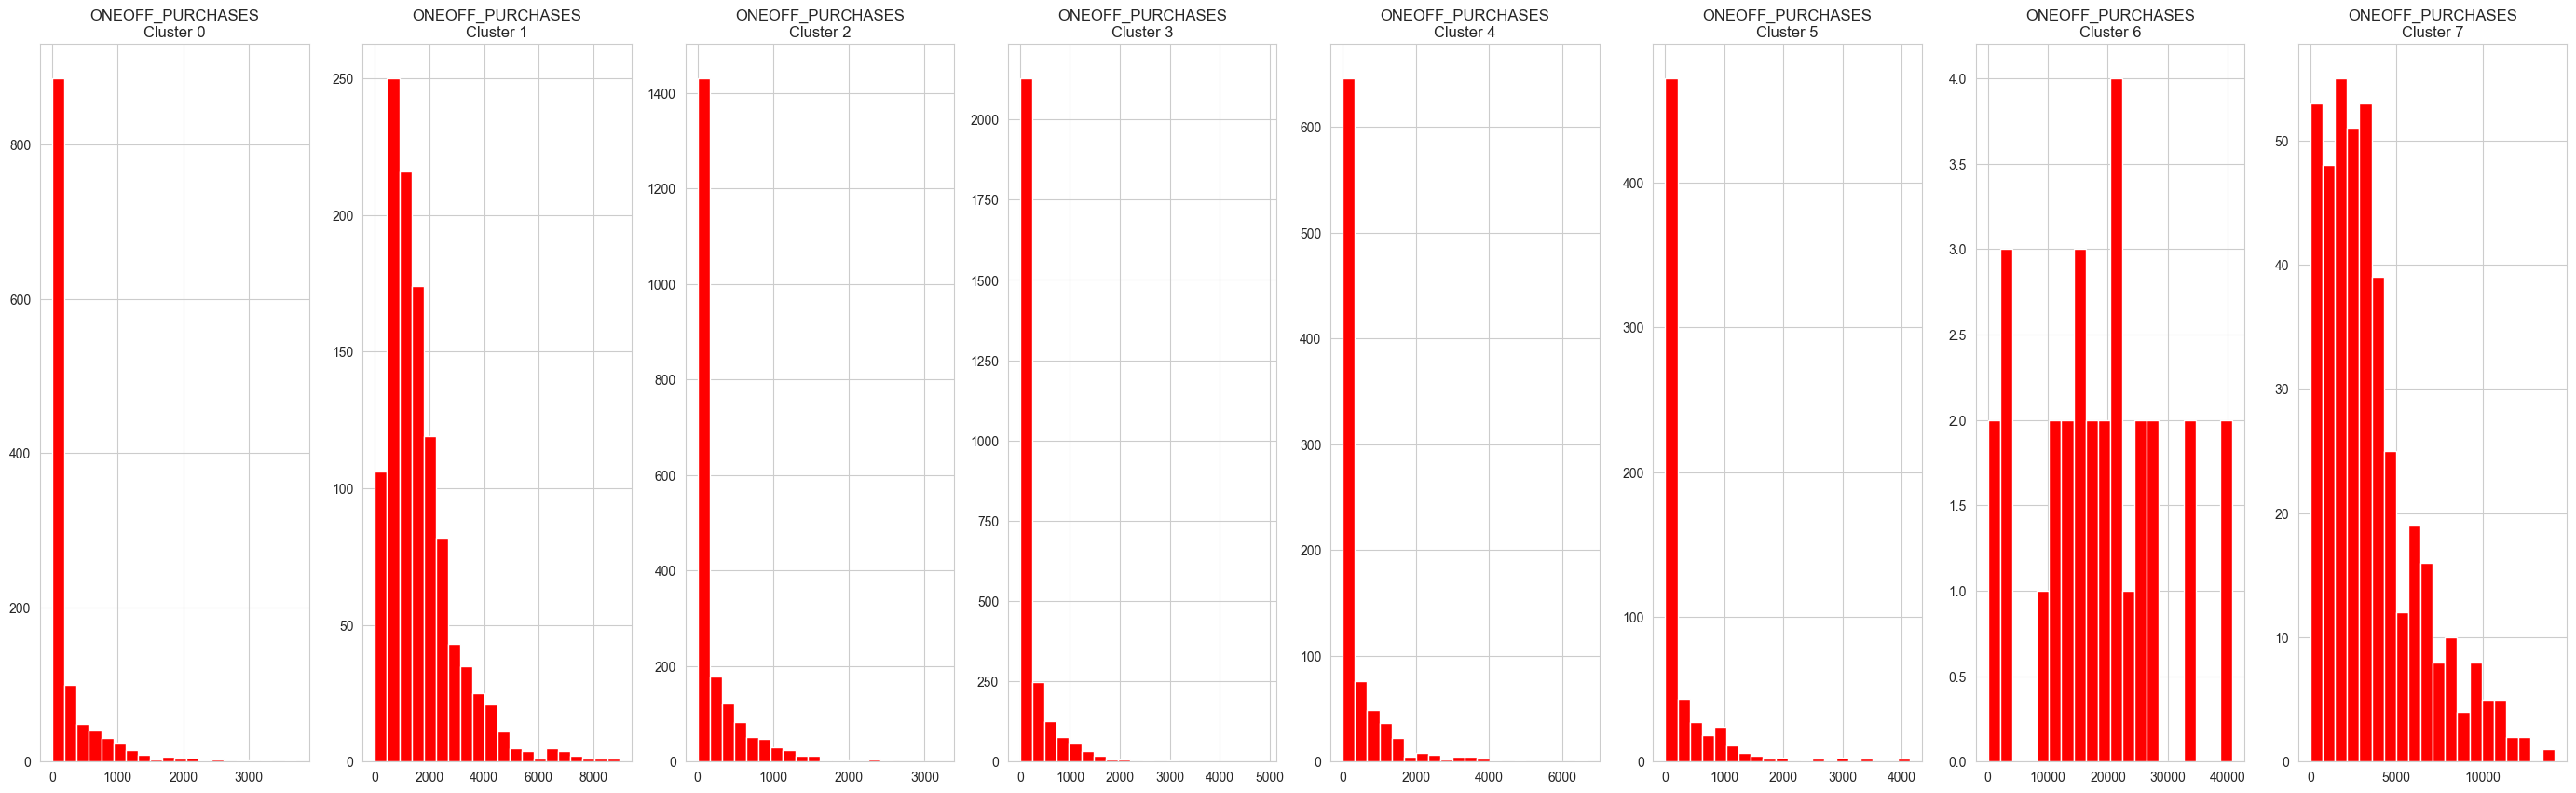

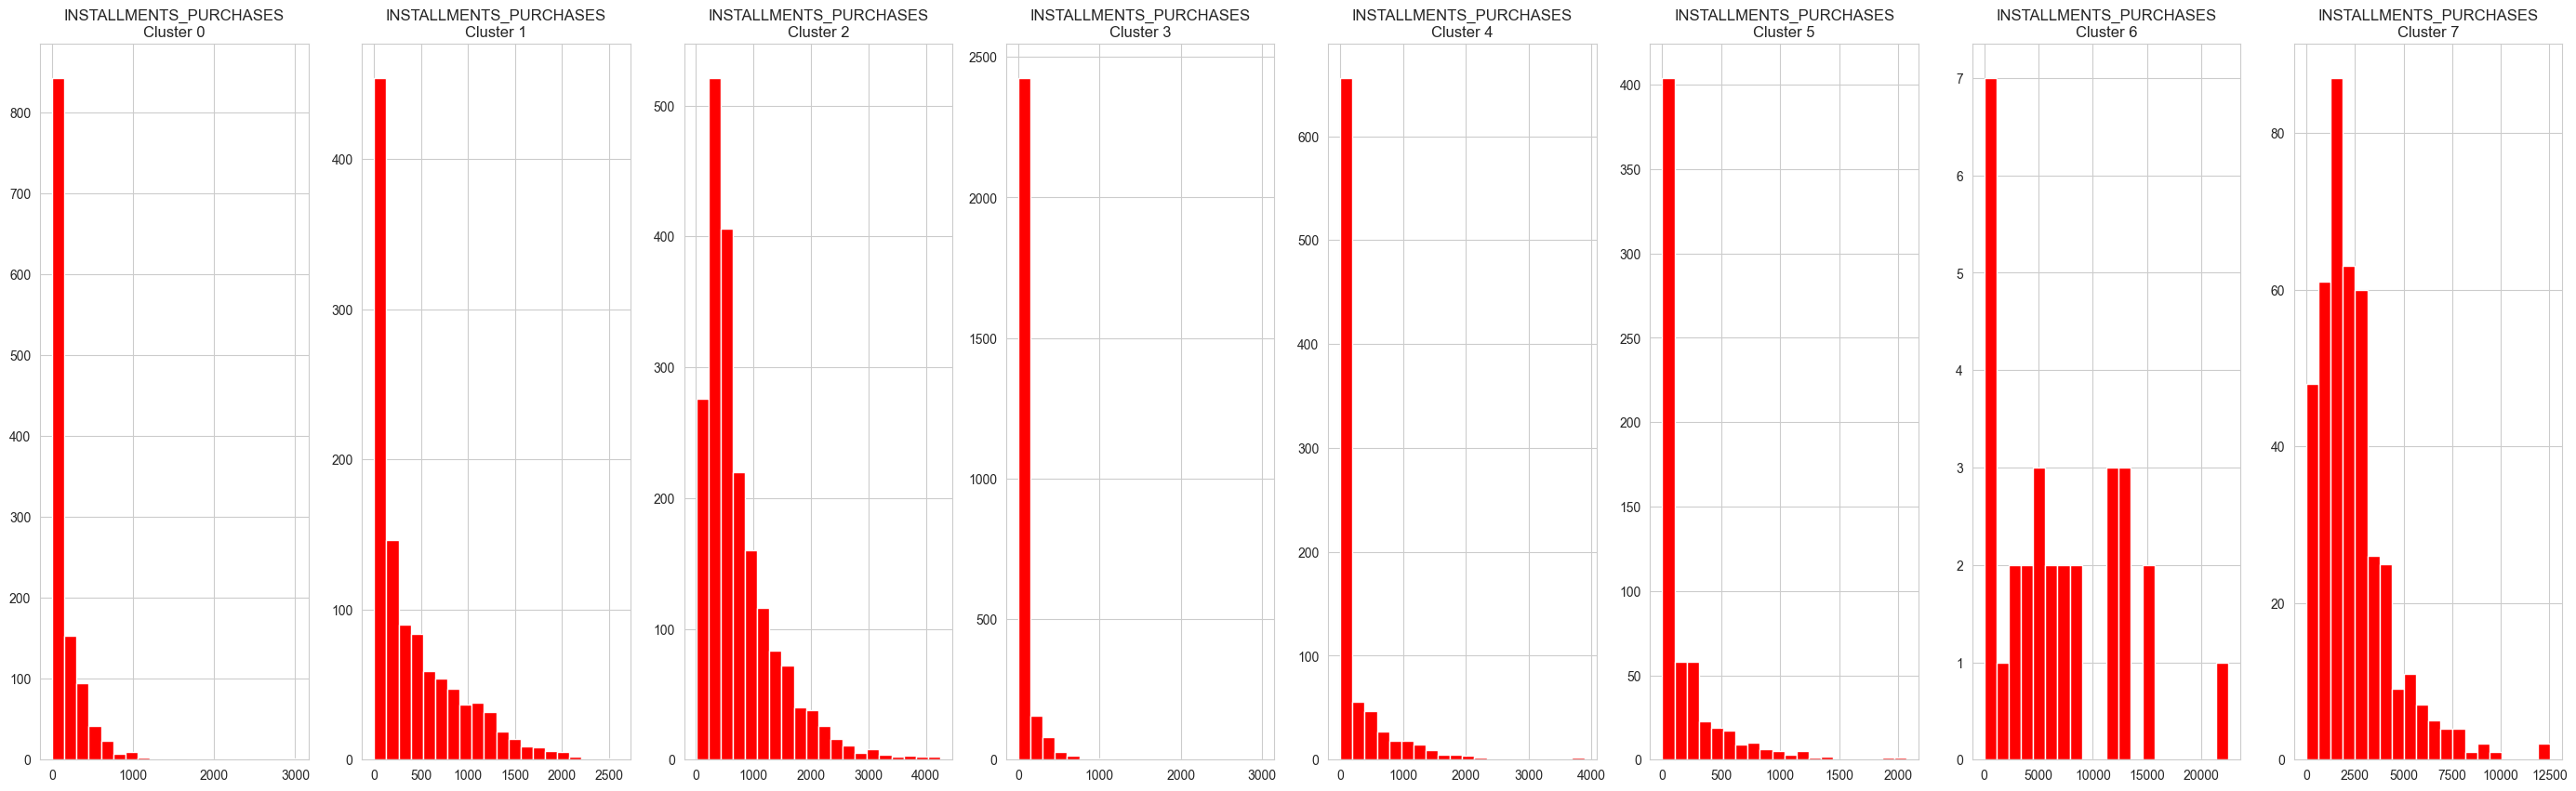

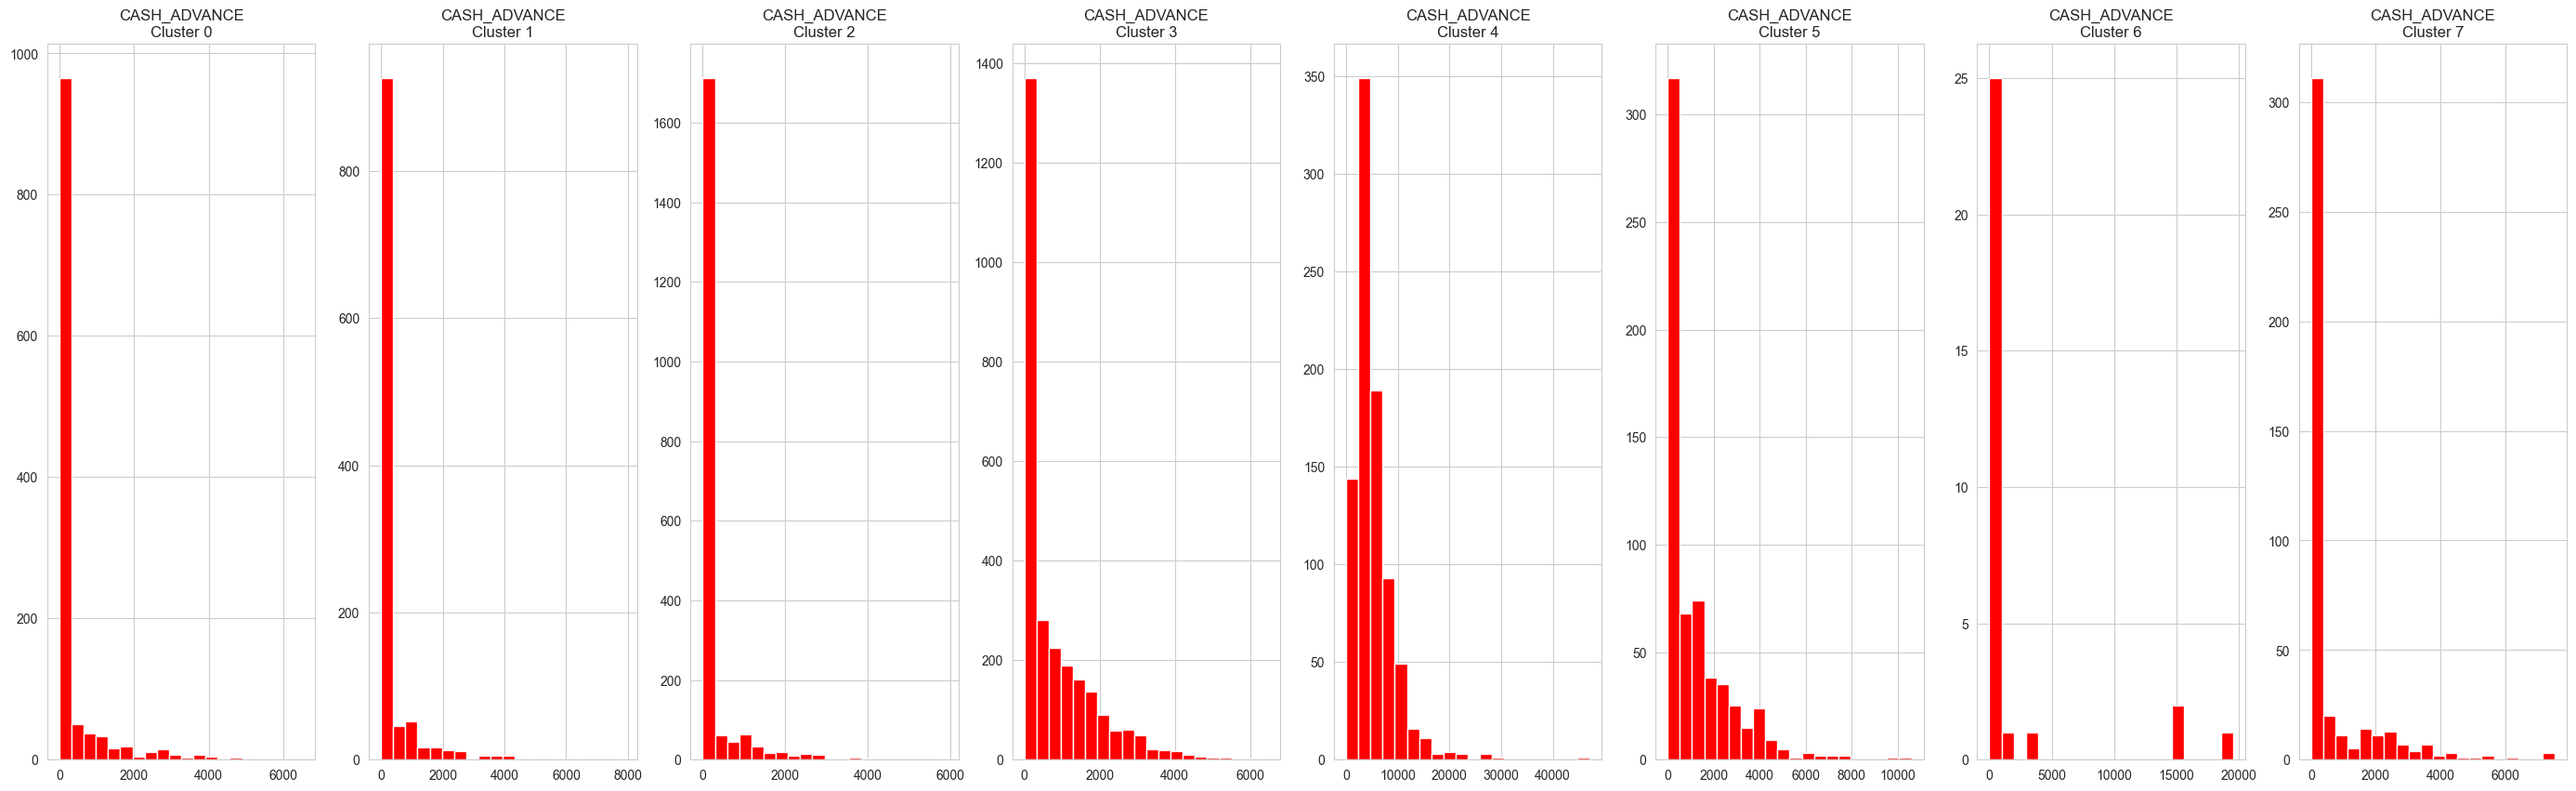

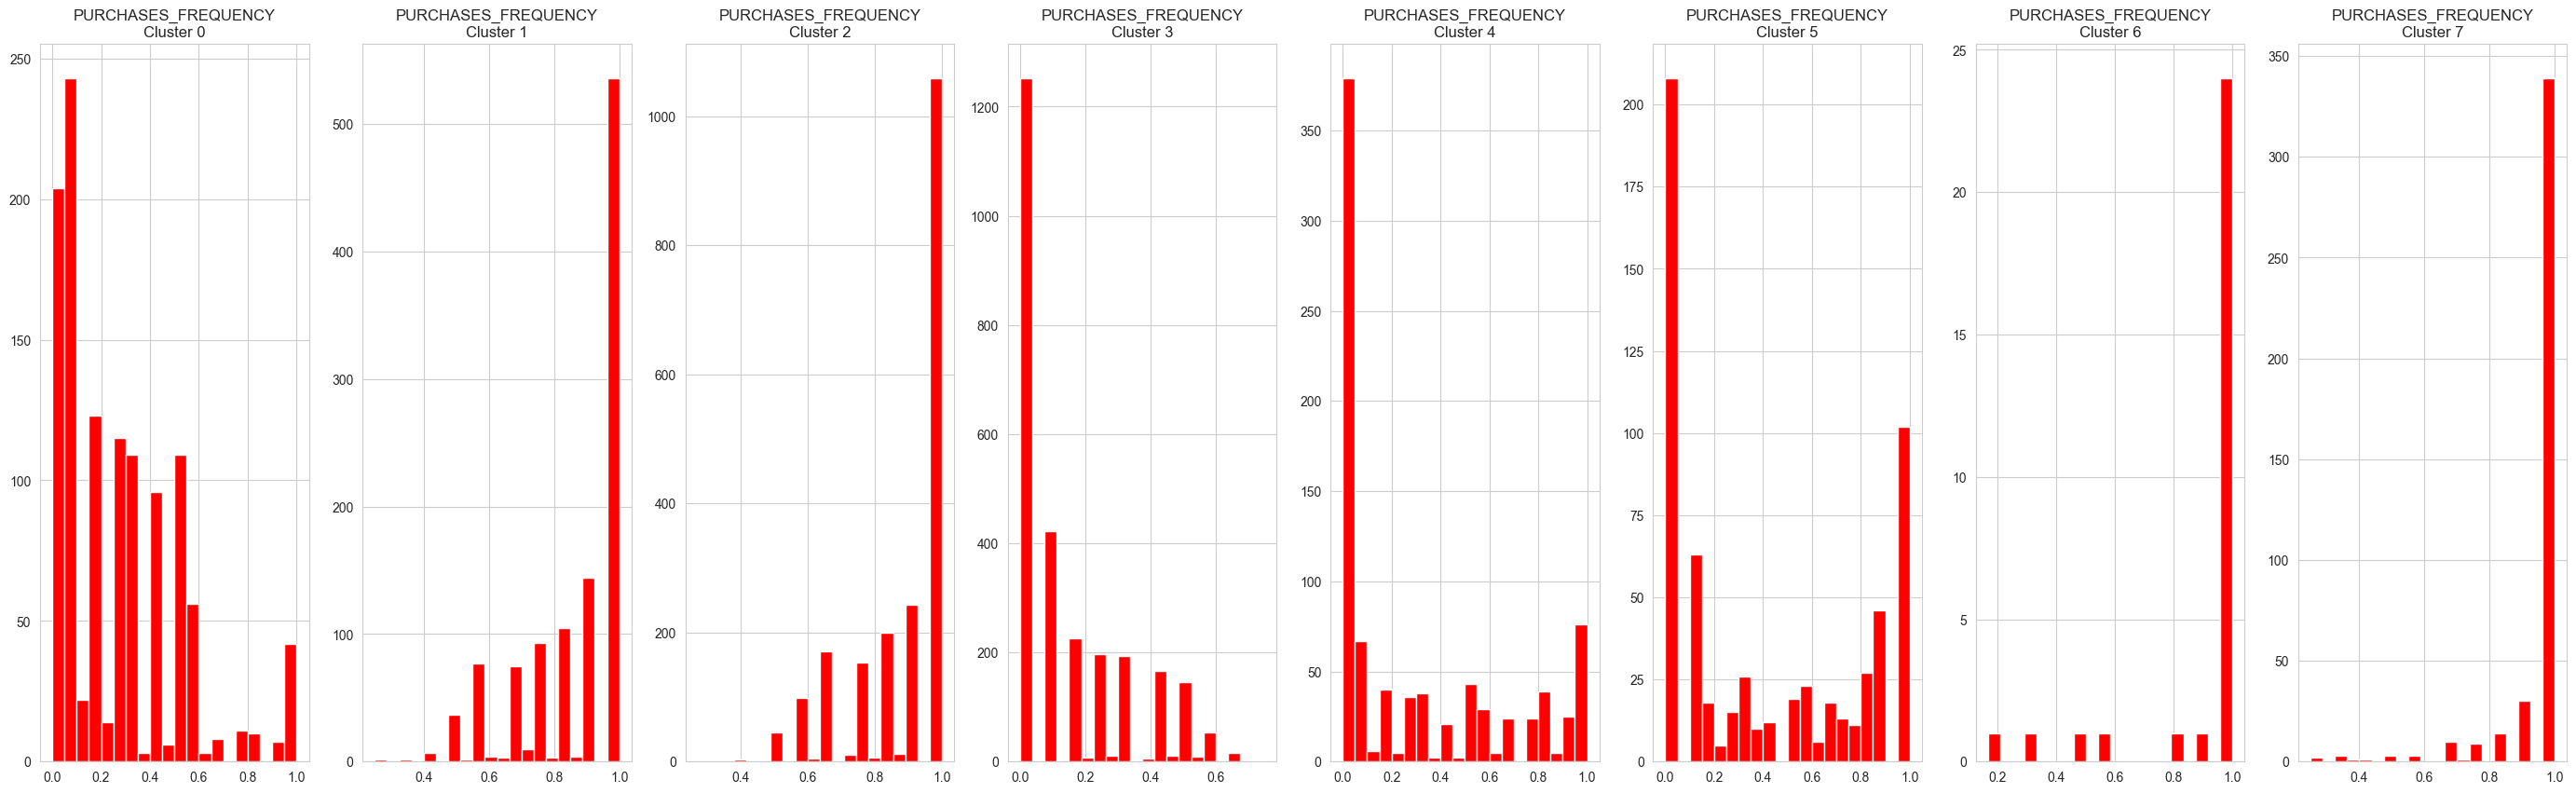

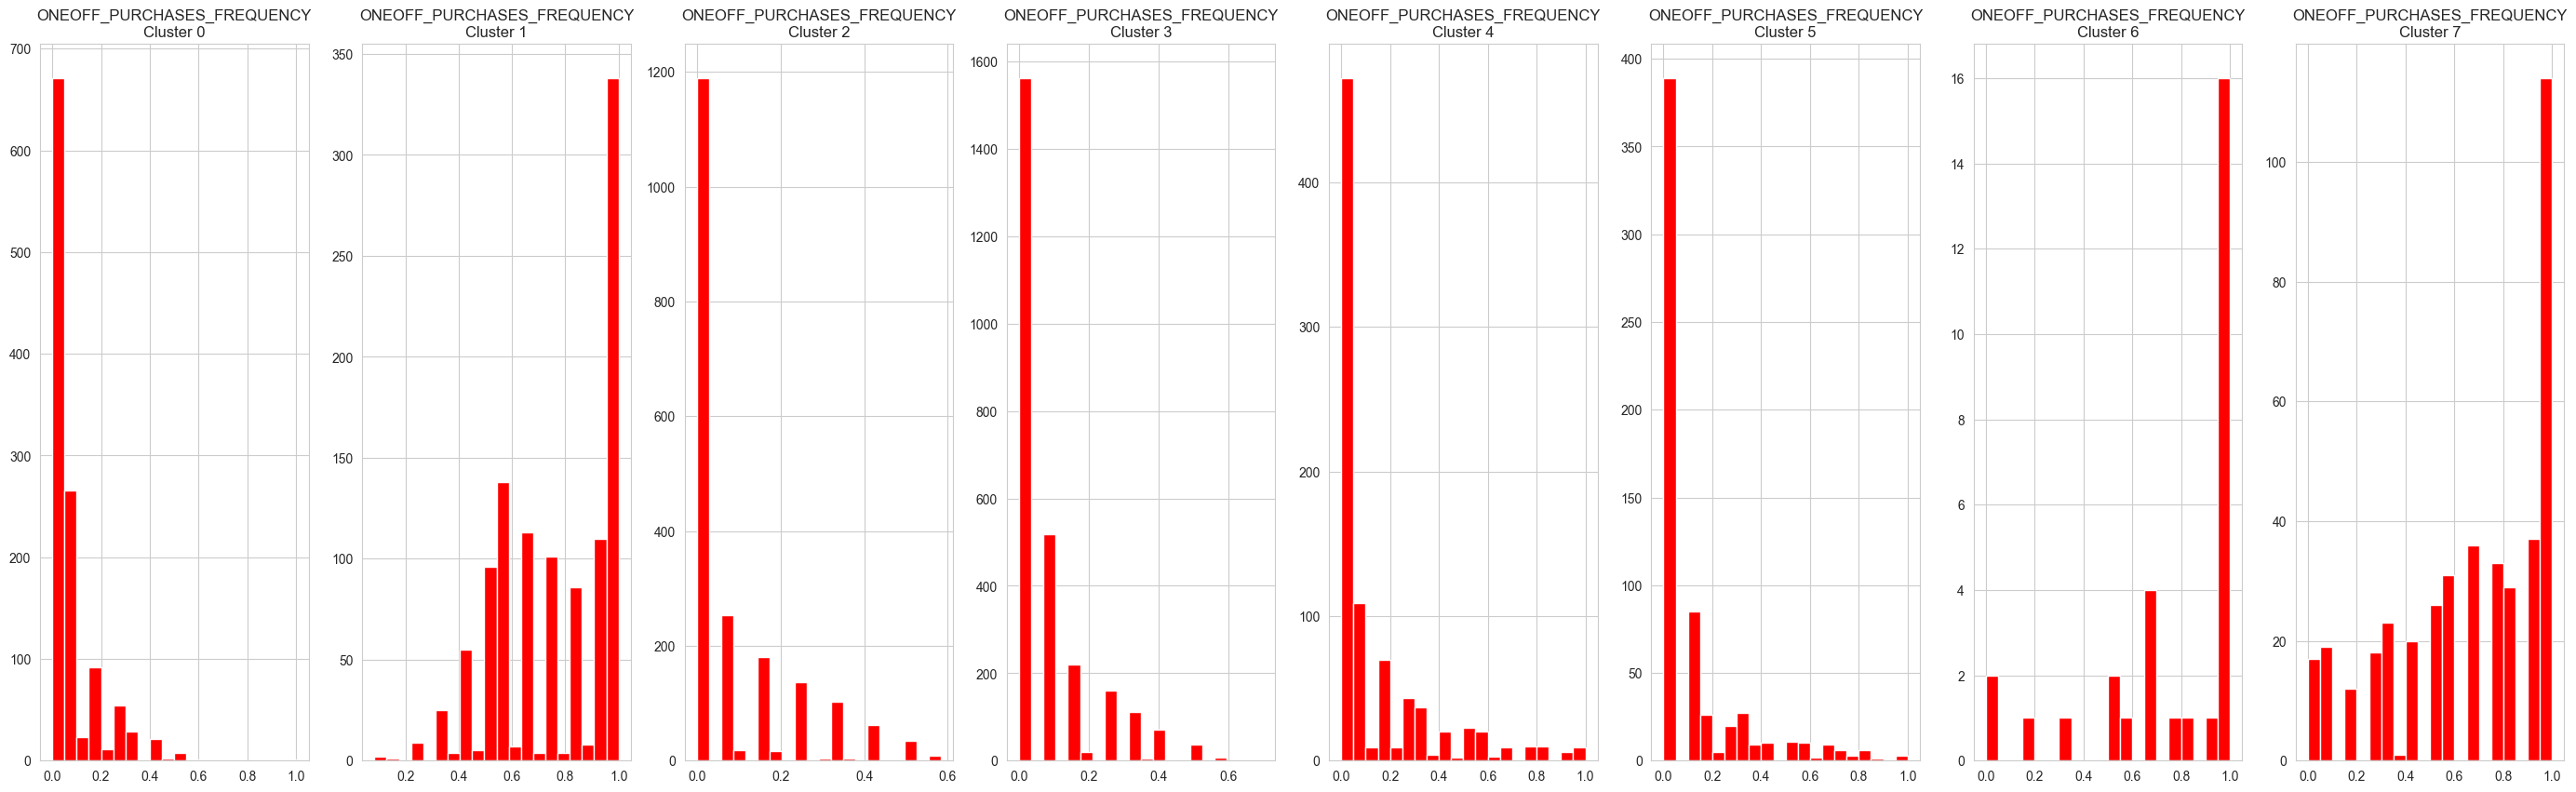

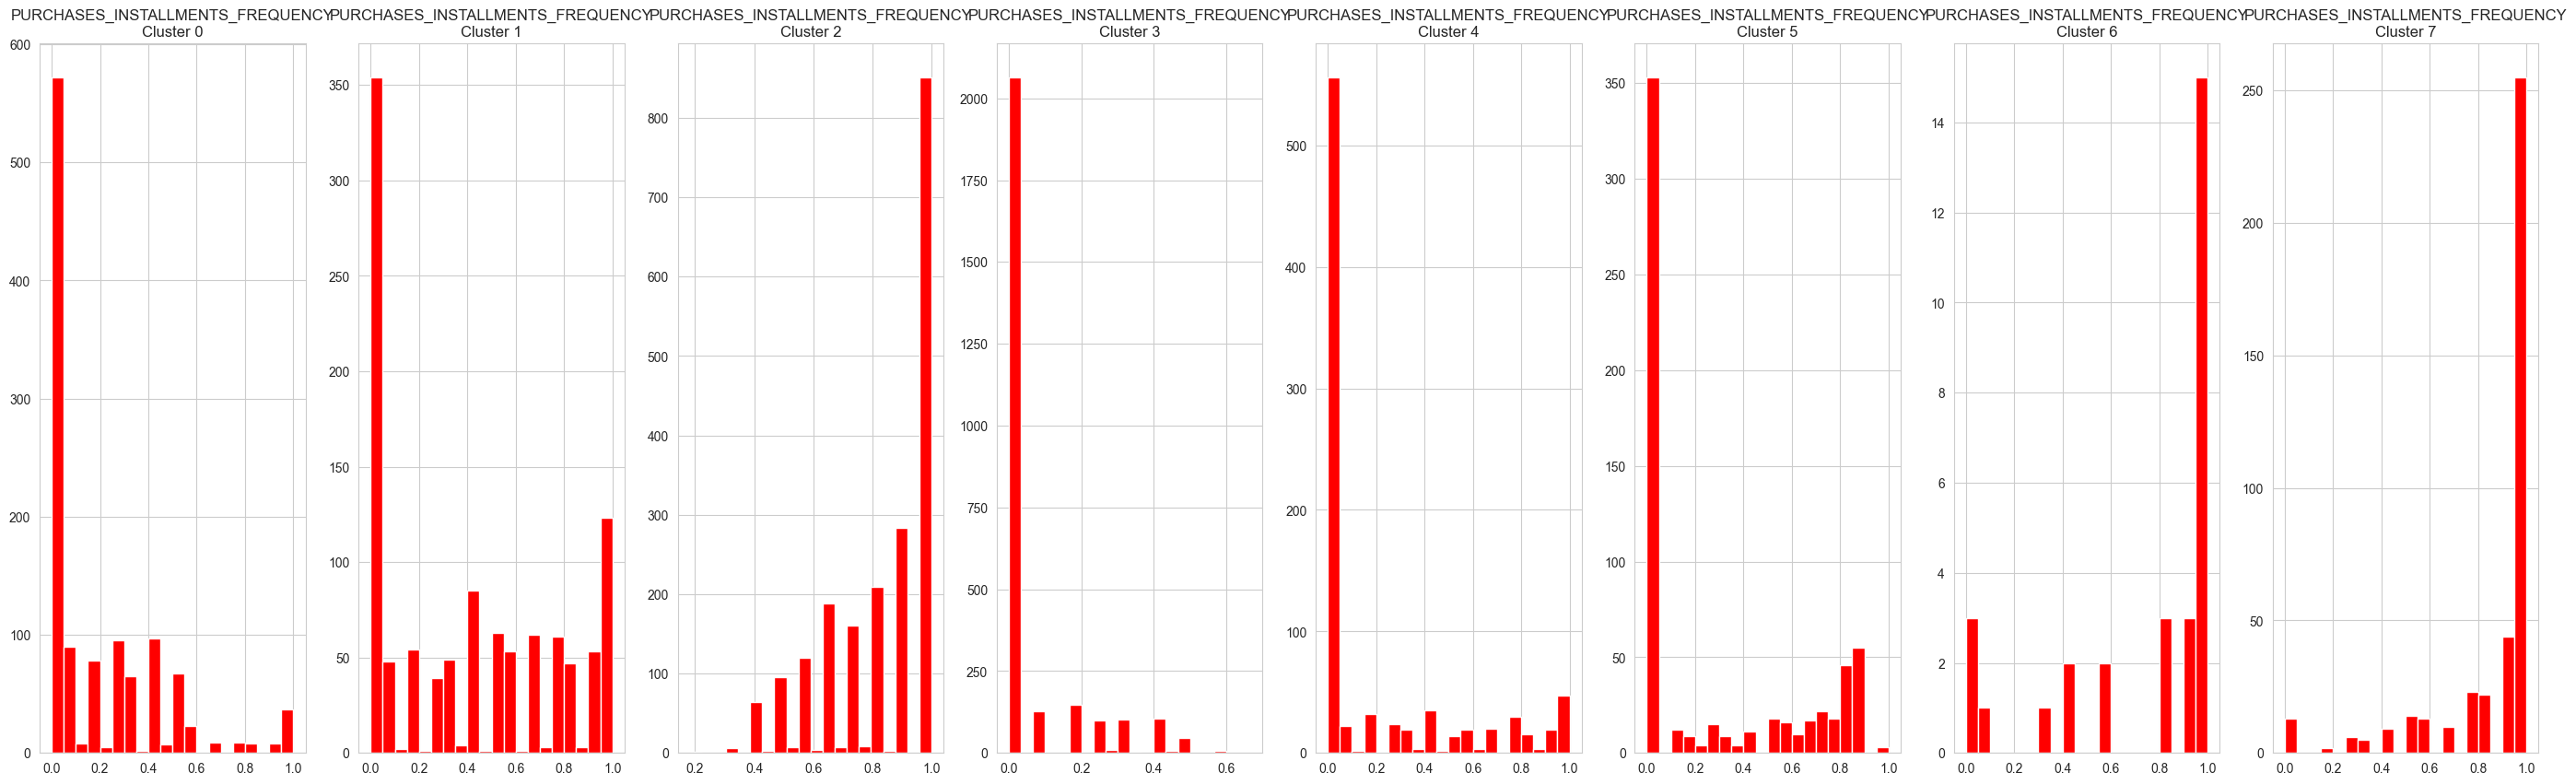

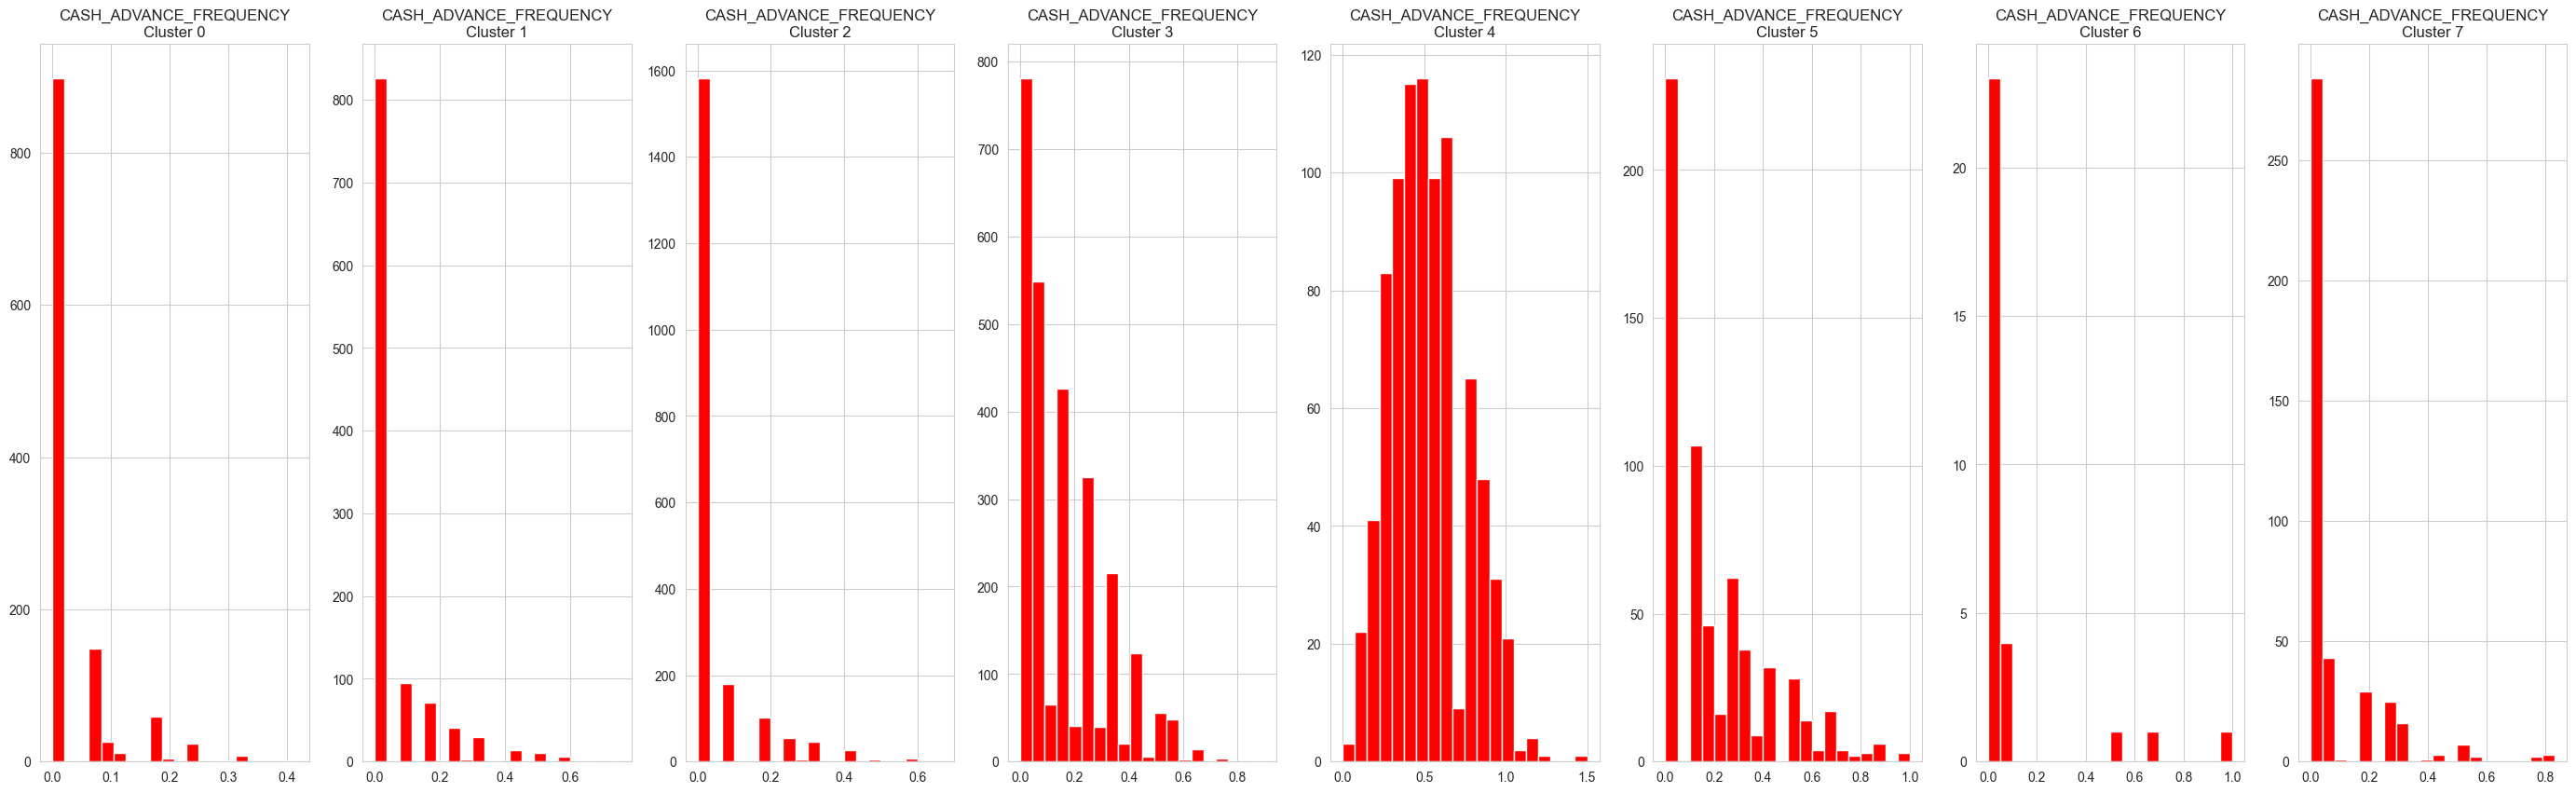

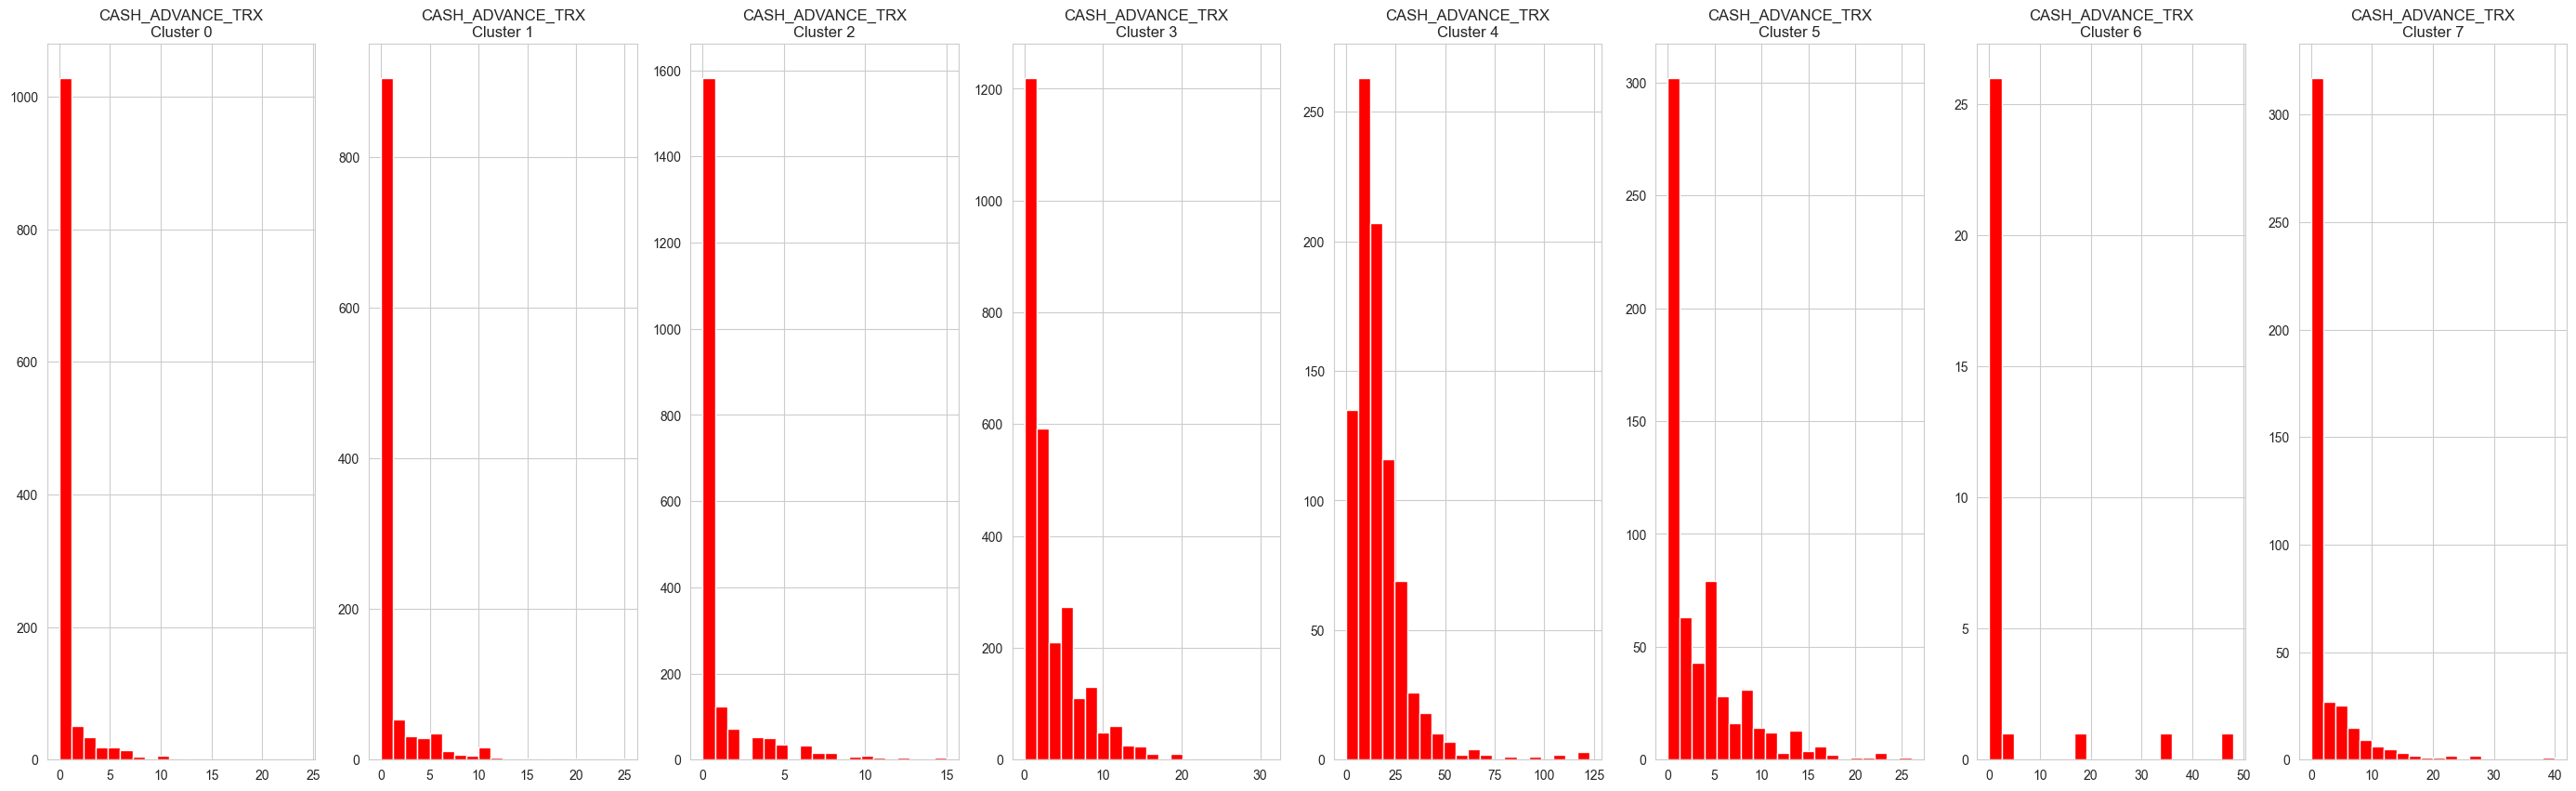

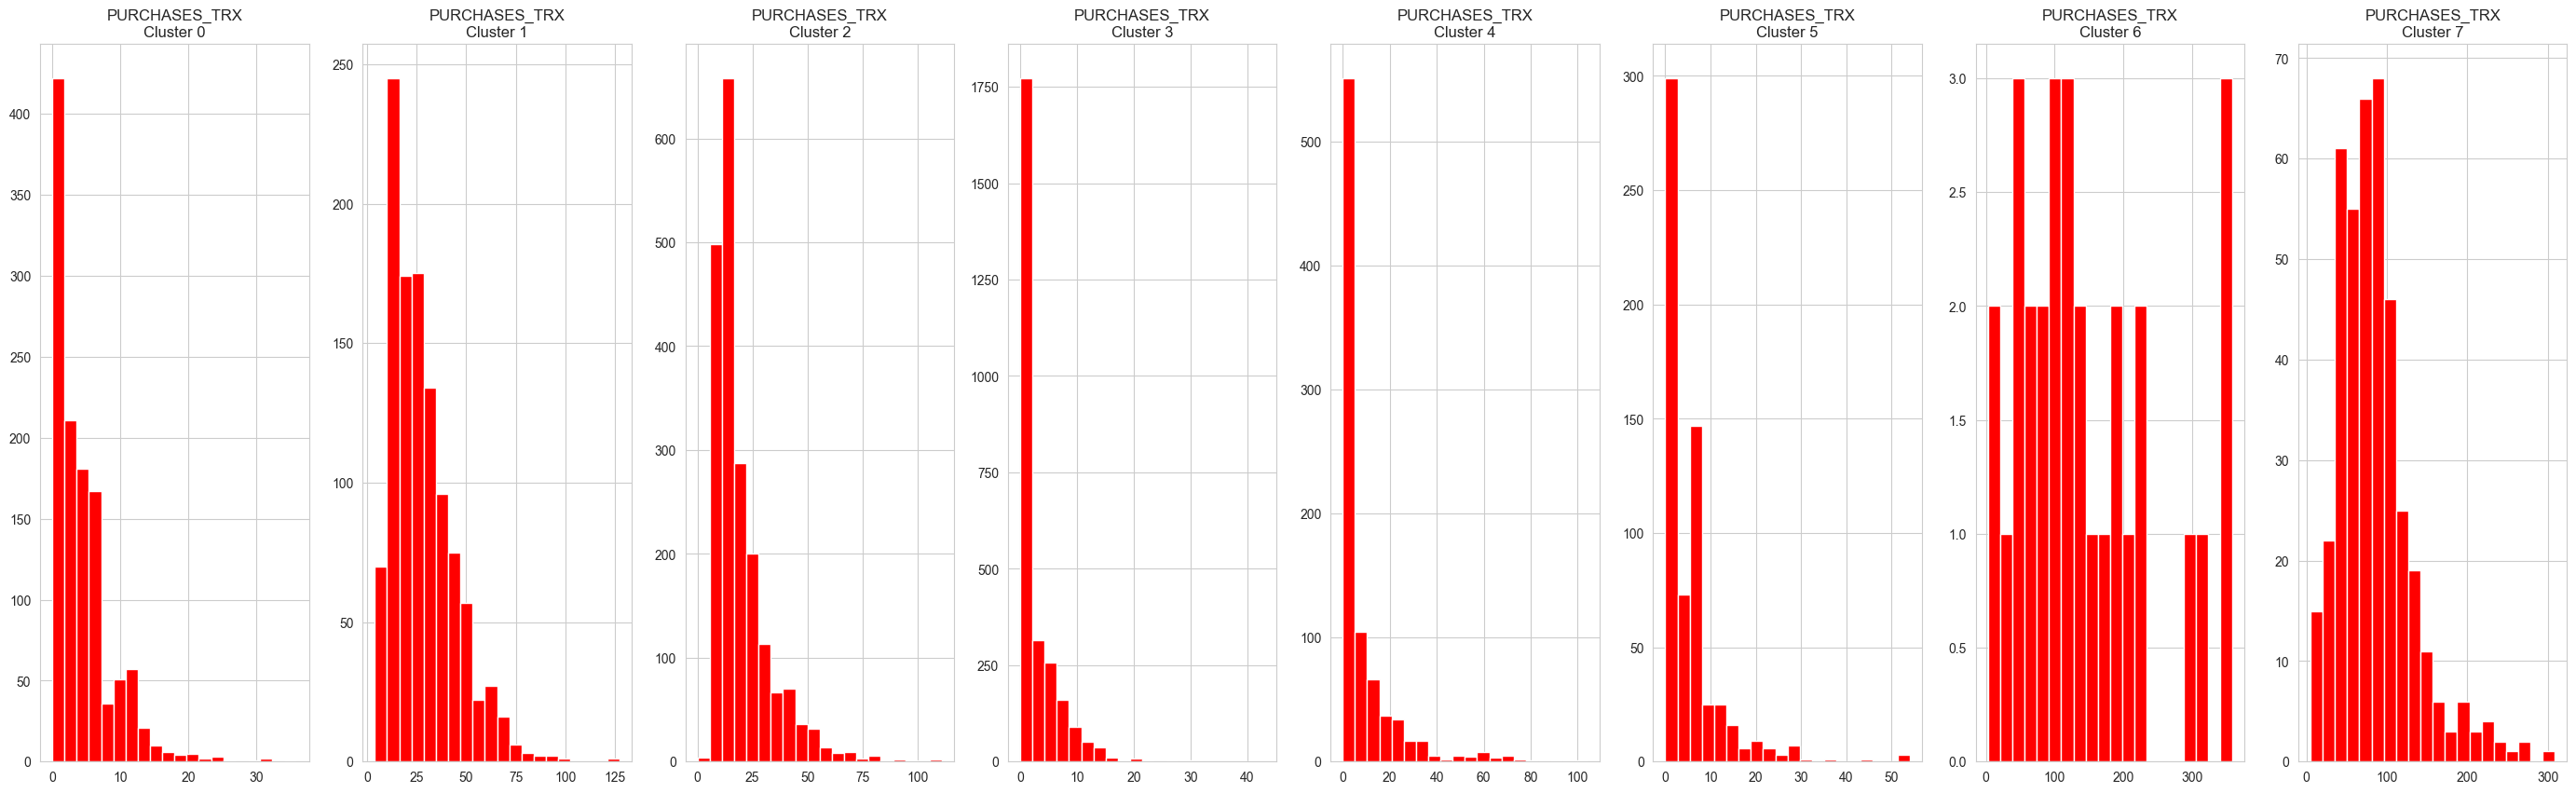

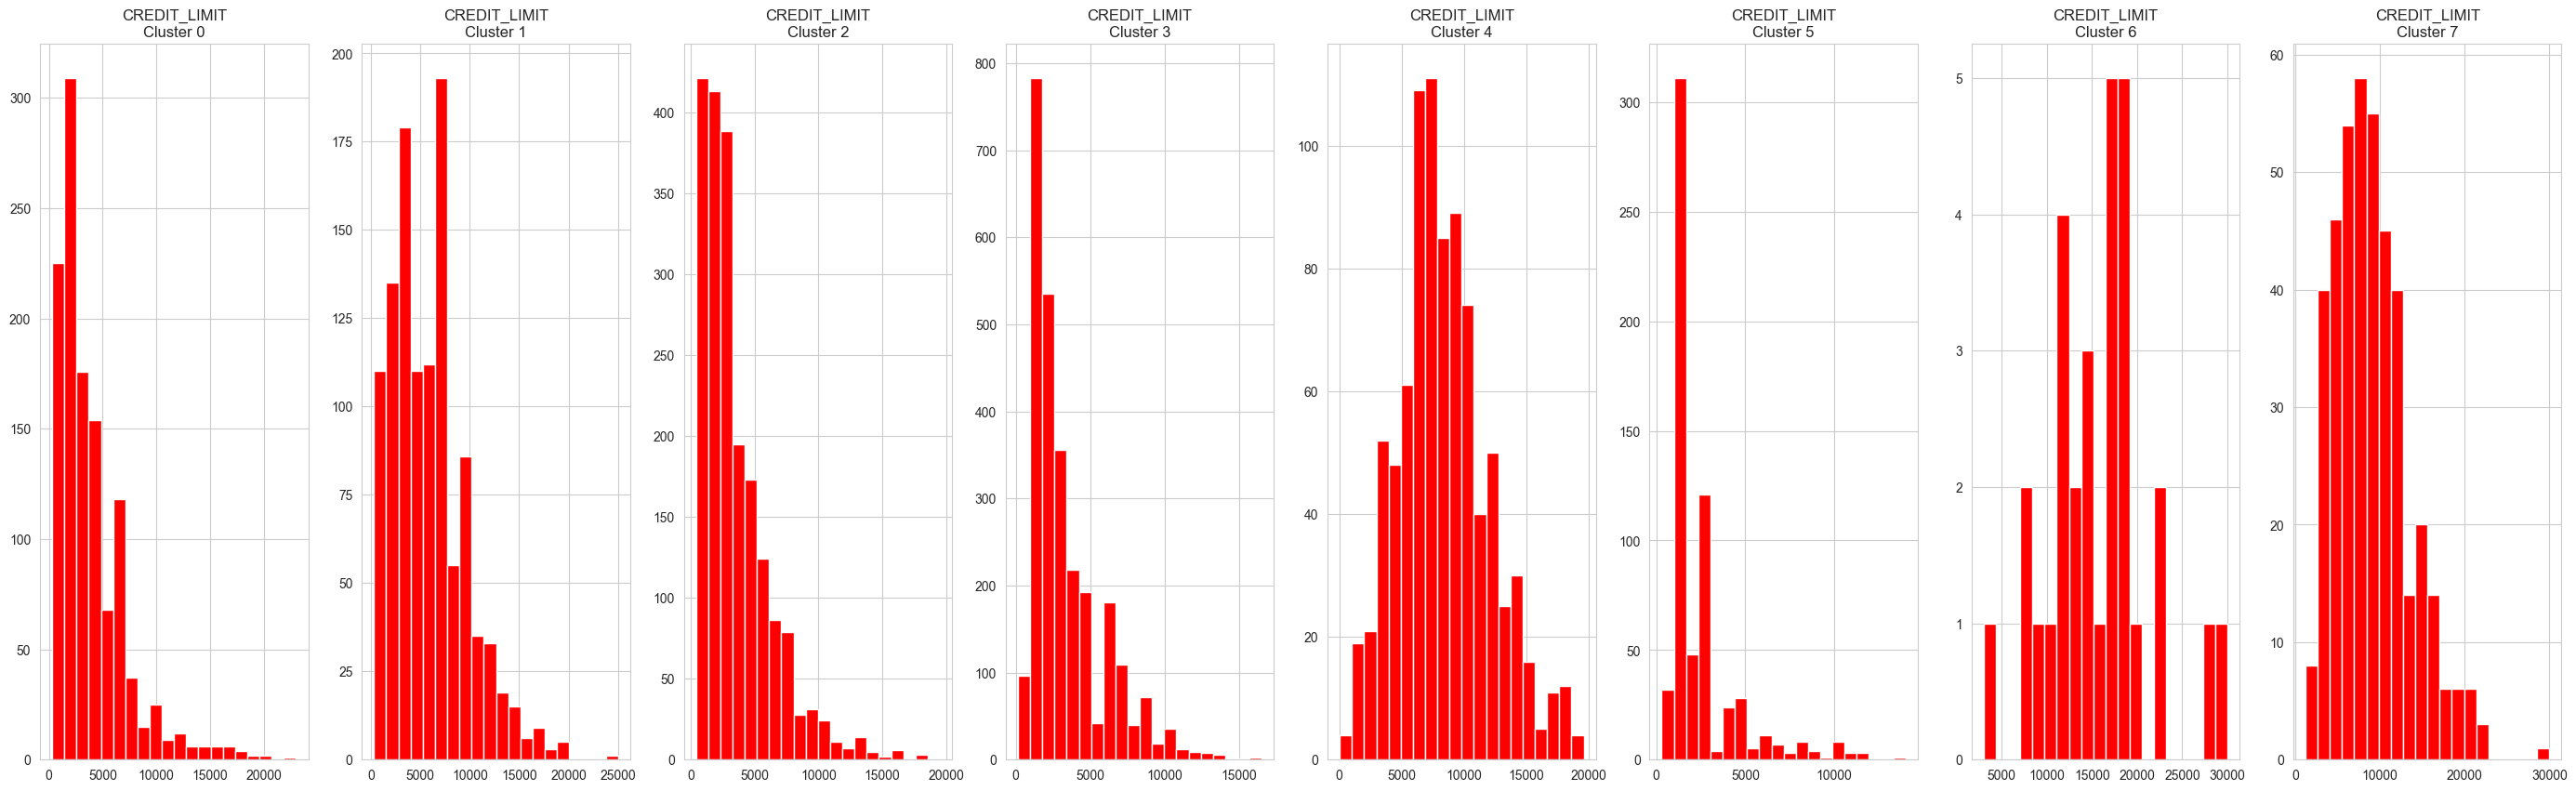

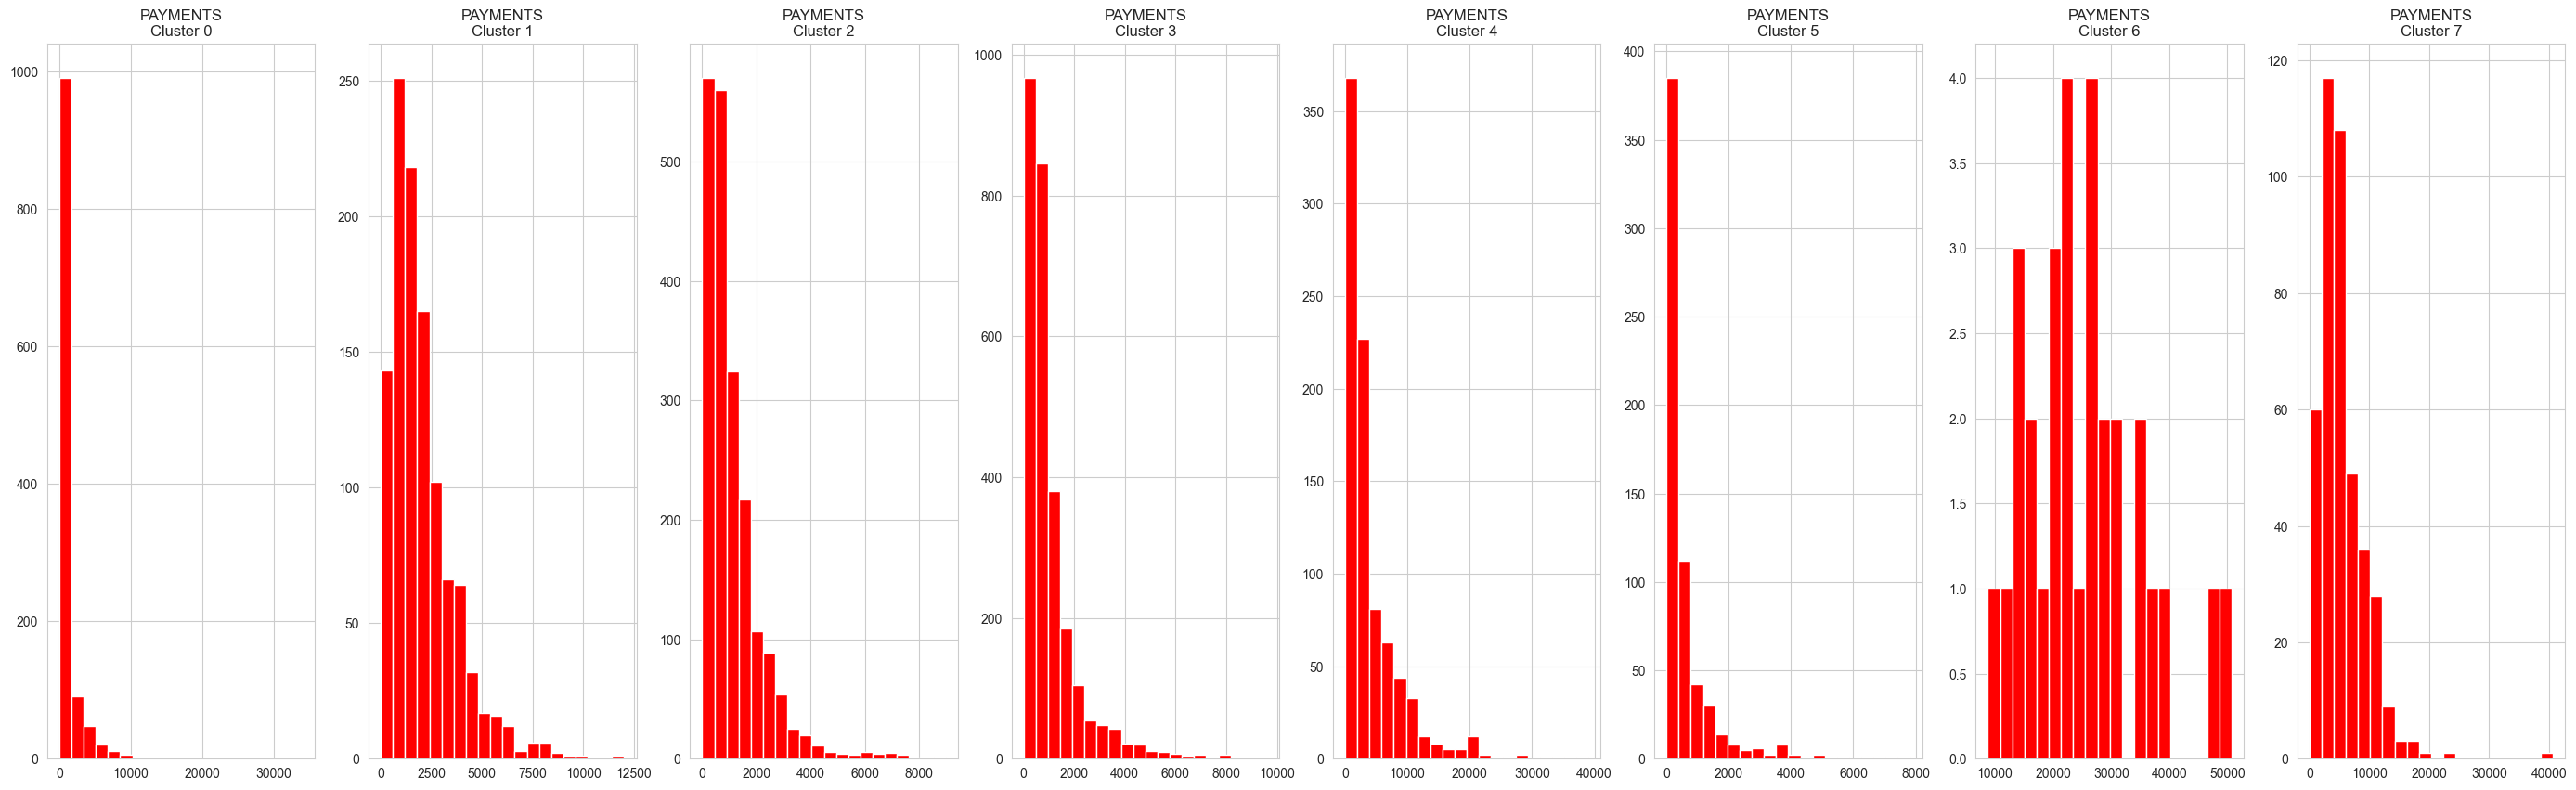

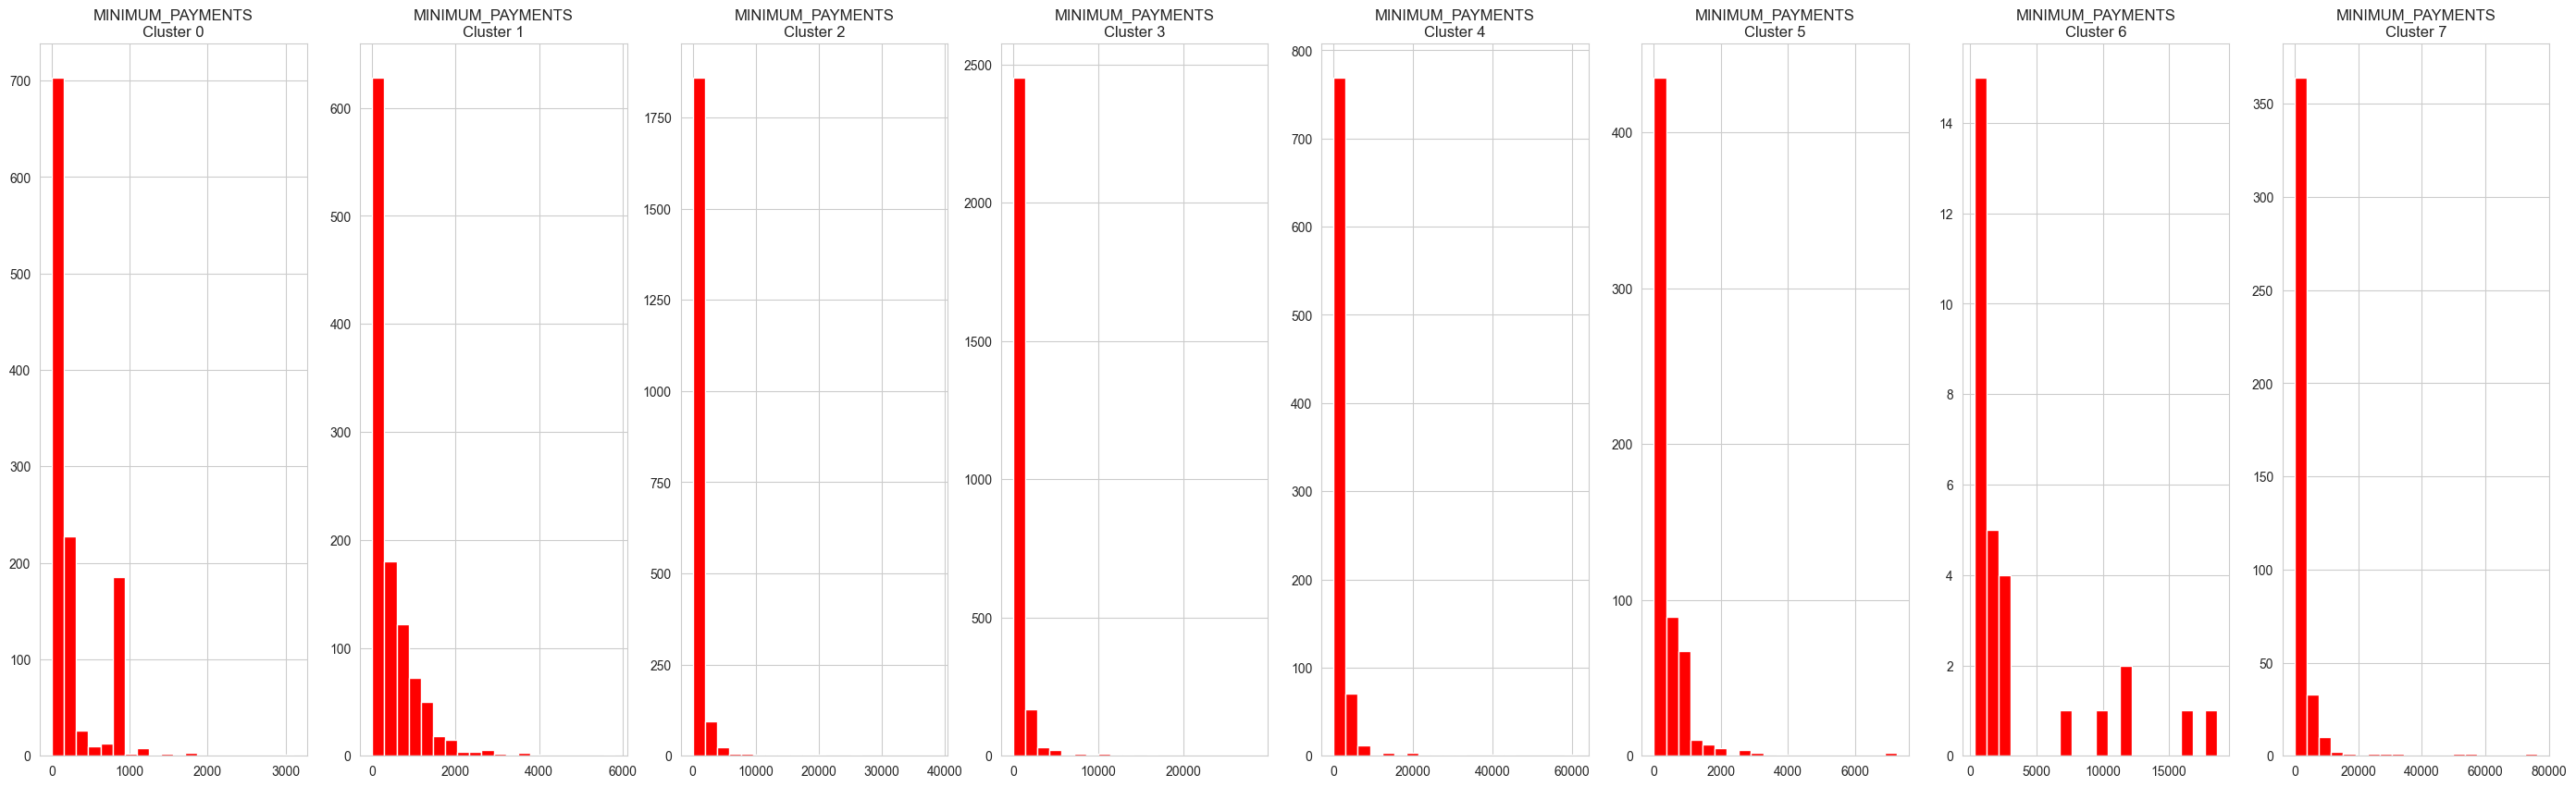

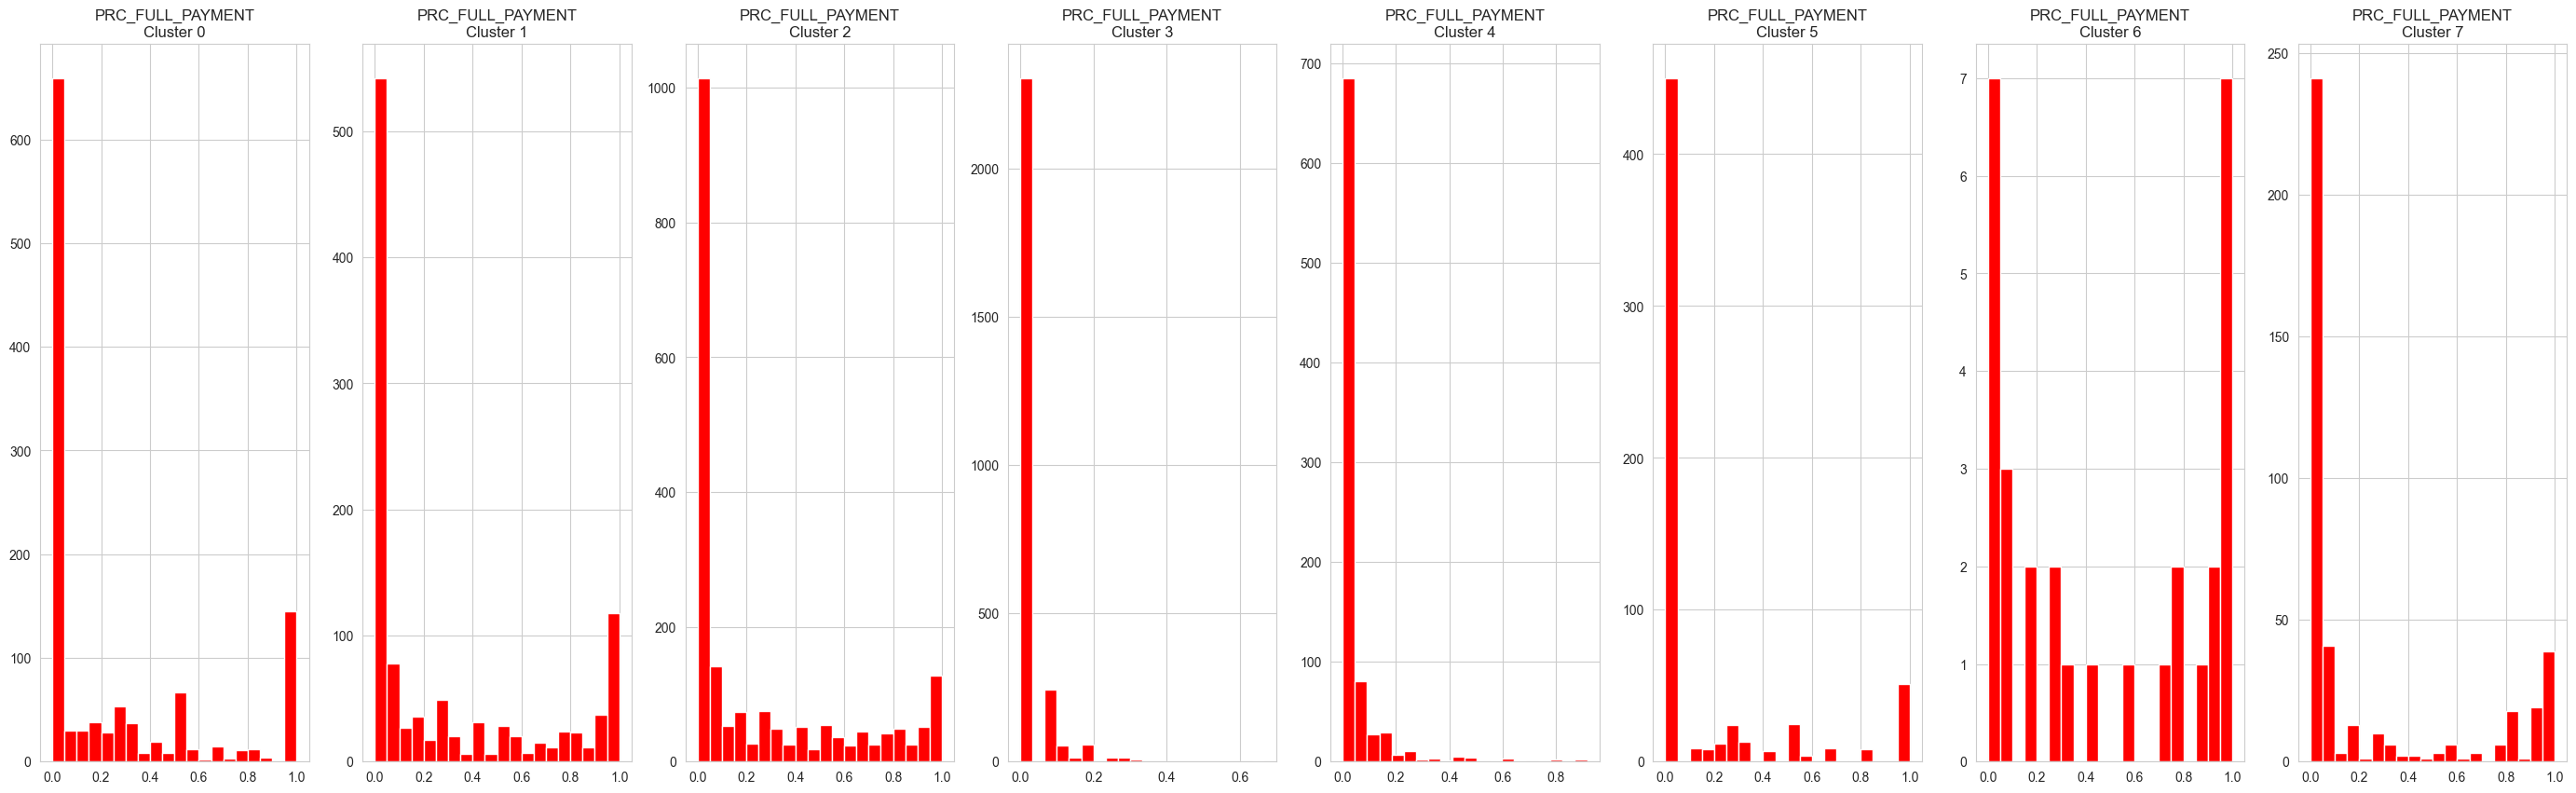

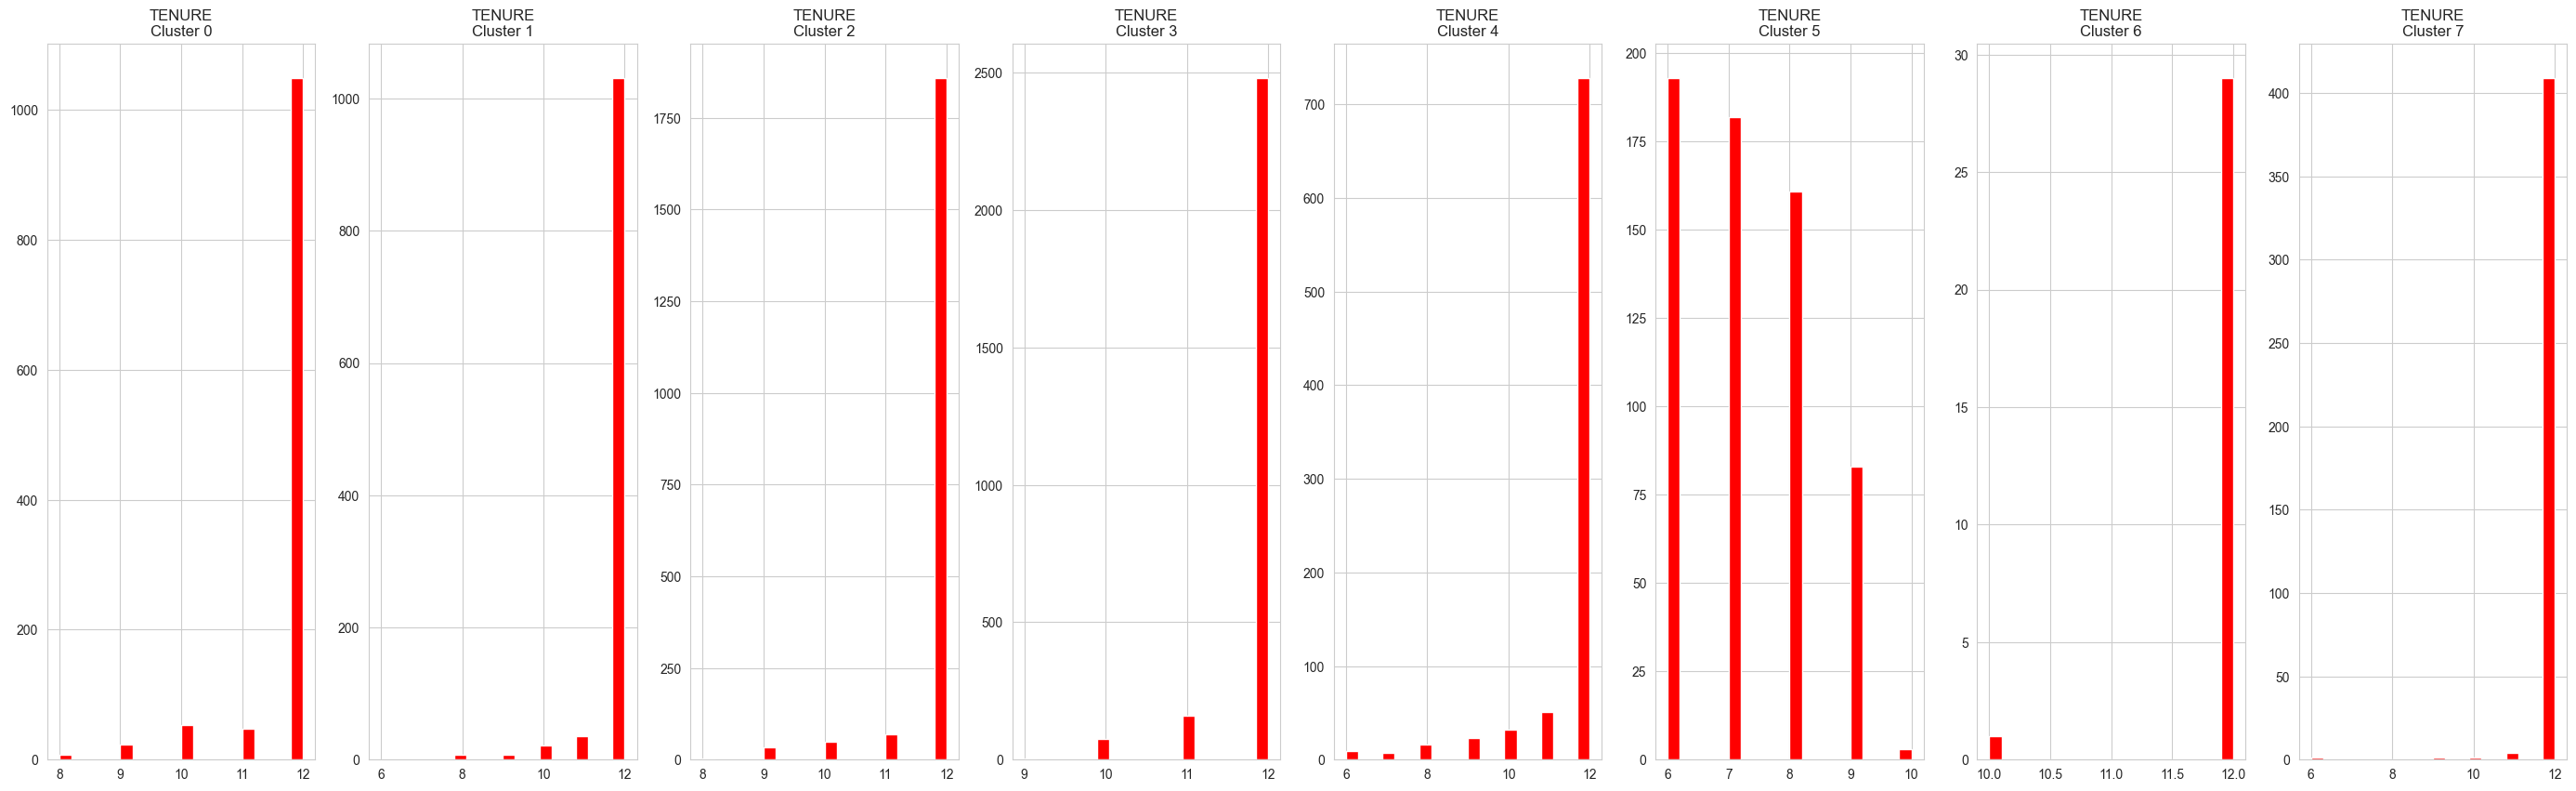

In [42]:
for i in df1.columns:
    plt.figure(figsize=(35,10))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = df1_cluster[df1_cluster["Clusters"] == j]
        cluster[i].hist(bins=20, color="r")
        plt.title(f'{i}\nCluster {j}')

plt.show()

In [43]:
pca = PCA()

In [44]:
princi_components = pca.fit_transform(df1_scaled)

In [45]:
princi_components

array([[-1.68222026e+00, -1.07645061e+00,  4.88506522e-01, ...,
         1.51265232e-01,  4.84606264e-02, -1.61124288e-04],
       [-1.13829490e+00,  2.50647666e+00,  6.01212326e-01, ...,
        -5.32022203e-01, -8.28866189e-02,  3.00053022e-06],
       [ 9.69684015e-01, -3.83520301e-01,  1.02371379e-01, ...,
         2.22568714e-01,  5.11446435e-01,  2.18614634e-05],
       ...,
       [-9.26203638e-01, -1.81078560e+00, -4.74723055e-01, ...,
         4.61540324e-01,  1.57972324e-01, -1.63602147e-04],
       [-2.33655167e+00, -6.57966015e-01,  9.74725121e-01, ...,
         2.63541958e-01, -1.89518950e-01, -8.60462734e-05],
       [-5.56422165e-01, -4.00467124e-01,  1.01519557e+00, ...,
        -4.16874027e-01,  3.57907951e-01, -7.51773744e-05]])

In [46]:
vr = pca.explained_variance_ratio_
print(vr)

[2.72900372e-01 2.03019913e-01 8.79197945e-02 7.47997502e-02
 6.26279204e-02 5.75021129e-02 4.88723464e-02 4.25748554e-02
 3.82880445e-02 3.08000623e-02 2.37189739e-02 1.77363237e-02
 1.42649185e-02 1.21736915e-02 1.01298988e-02 2.67033632e-03
 6.85223491e-07]


In [47]:
pca_main = PCA(n_components=2)


In [48]:
principal_comp  = pca_main.fit_transform(df1_scaled)

In [49]:
principal_comp 

array([[-1.68222204, -1.07645617],
       [-1.13830007,  2.50646531],
       [ 0.96969585, -0.38349218],
       ...,
       [-0.92620364, -1.8107878 ],
       [-2.33655321, -0.65797055],
       [-0.55641599, -0.40044864]])

In [50]:
pca_main.explained_variance_ratio_

array([0.27290037, 0.20301991])

In [51]:
pca_df = pd.DataFrame(data = principal_comp, columns =['PCA1','PCA2'])
pca_df.head()


PCA1      PCA2
0 -1.682222 -1.076456
1 -1.138300  2.506465
2  0.969696 -0.383492
3 -0.873635  0.043147
4 -1.599433 -0.688580

In [52]:
pca_df = pd.concat([pca_df,pd.DataFrame({'Cluster':kmeans.labels_})], axis = 1)
display(pca_df)


PCA1      PCA2  Cluster
0    -1.682222 -1.076456        3
1    -1.138300  2.506465        4
2     0.969696 -0.383492        1
3    -0.873635  0.043147        3
4    -1.599433 -0.688580        3
...        ...       ...      ...
8945 -0.359628 -2.016145        5
8946 -0.564371 -1.639130        5
8947 -0.926204 -1.810788        5
8948 -2.336553 -0.657971        5
8949 -0.556416 -0.400449        5

[8950 rows x 3 columns]

In [53]:
pca_df.value_counts(pca_df["Cluster"])

Cluster
3    2718
2    2011
0    1181
1    1106
4     866
5     622
7     416
6      30
Name: count, dtype: int64

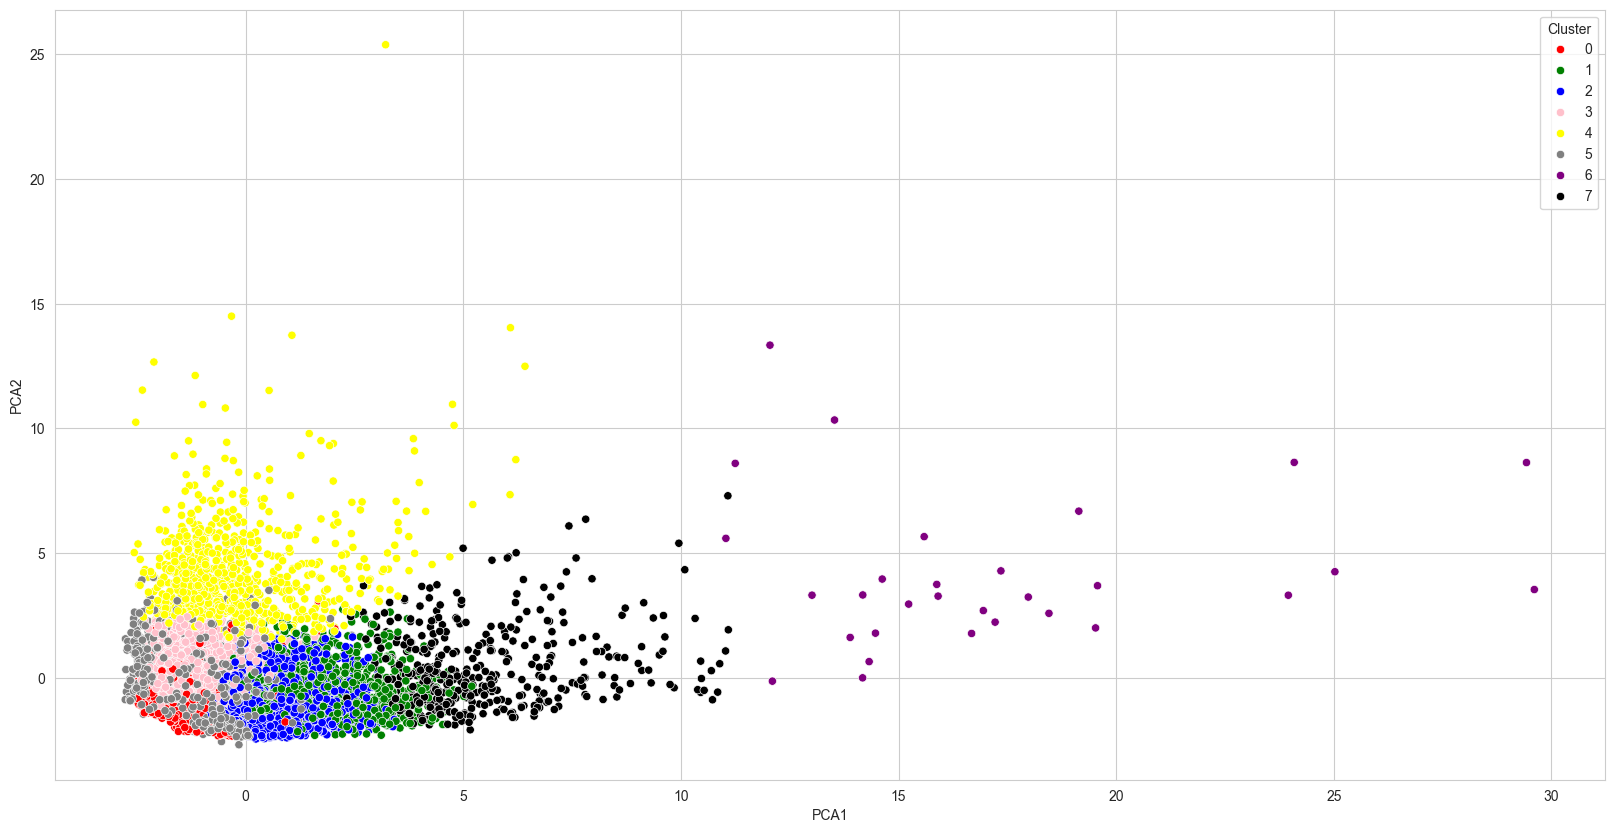

In [54]:
plt.figure(figsize=(20,10))
fig = sns.scatterplot(x="PCA1", y="PCA2", hue = "Cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()
